In [1]:
import pandas as pd
import numpy as np
import tarfile
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
file = tarfile.open(f'MSCallGraph_0.tar.gz')

# extracting file
file.extractall('./')

file.close()

In [3]:
df = pd.read_csv('MSCallGraph_0.csv')
df=df.drop(['Unnamed: 0','timestamp','rpcid','interface','rt',],axis=1)
df = df.replace('(?)', np.NaN)
df = df.replace('', np.NaN)
df = df.replace('NAN', np.NaN)
df = df.dropna()
df = df.drop_duplicates()
df

traceid  \
0        0b133c1915919238193454000e5d37   
11       0b133c1915919238193454000e5d37   
20       0b133c1915919238193454000e5d37   
26       0b133c1915919238193454000e5d37   
42       0b133c1915919238193454000e5d37   
...                                 ...   
6088821  0b52069415919238409694000ea18b   
6088829      015101cf15919238987695000e   
6088839  0b52069415919238409694000ea18b   
6088842  0b52069415919238409694000ea18b   
6088845  0b52069415919237741588000ea044   

                                                        um      rpctype  \
0        5cca70246befb1f4c9546d2912b9419dee54439218efa5...           mc   
11       4ab265f54516248ee8873be7d6441912456ce17e84f399...           mc   
20       5cca70246befb1f4c9546d2912b9419dee54439218efa5...  userDefined   
26       75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...          rpc   
42       4ab265f54516248ee8873be7d6441912456ce17e84f399...           mc   
...                                                    ...          ...   
6088821  9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...          rpc   
6088829  35114acfb54c54fb9618f23cd28bbc57c765f597df1409...           mc   
6088839  614c66b178d3cfe299b11254ecb4321f85beca4b2ccac8...           mc   
6088842  614c66b178d3cfe299b11254ecb4321f85beca4b2ccac8...          rpc   
6088845  95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...           mc   

                                                        dm  
0        b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...  
11       fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...  
20       5cca70246befb1f4c9546d2912b9419dee54439218efa5...  
26       84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...  
42       01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...  
...                                                    ...  
6088821  0d4e0aa3996cbc207424a87d8ce16610b7694e2fac37d7...  
6088829  9653f5baba69c9fb50bfb30a8571eb04dbceaae7c7f379...  
6088839  4bba5c2371c3384862e69615979c2aa5b7f1b4fc3ea914...  
6088842  9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...  
6088845  9653f5baba69c9fb50bfb30a8571eb04dbceaae7c7f379...  

[1637088 rows x 4 columns]

In [4]:
def draw_tree_graph_hierarchical(triplets,root):
    print("total triplets: ",len(triplets))
    inserted_triplets = set()
    from anytree import Node, RenderTree
    treeDict = {}
    rootNode = Node(root)
    treeDict[root] = rootNode

    i = 0
    while len(triplets)>0 and i<len(triplets):
        try:
            tempNode = treeDict[triplets[i][2]]
            newNode = Node(triplets[i][0],parent = tempNode)
            treeDict[triplets[i][0]] = newNode
            removed_elem = tuple(triplets.pop(i))
            inserted_triplets.add(removed_elem)
            i = 0
        except:
            i +=1
    print("Left elements: ", len(triplets))
    from anytree.exporter import DotExporter
#     for pre, fill, node in RenderTree(rootNode):
#         print("%s%s" % (pre, node.name))
    from anytree import LevelOrderGroupIter
    level_list = [[node.name for node in children] for children in LevelOrderGroupIter(rootNode, stop=lambda n: n == None)]
#     print(level_list)
    import networkx as nx
    import matplotlib.pyplot as plt

    labelsDict = {}
    # Create a graph object
    G = nx.Graph()
    for i in range(len(level_list)):
        for j in range(len(level_list[i])):
            G.add_node(level_list[i][j],layer = i)
            labelsDict[level_list[i][j]] = level_list[i][j][:3]+".."

    for triplet in inserted_triplets:
        G.add_edge(triplet[0], triplet[2], label=triplet[1])

#     node_size = 30
    # Use NetworkX's built-in drawing function to visualize the graph
    # nx.draw(G)
#     pos = nx.multipartite_layout(G,subset_key="layer")
#     nx.draw_networkx_edges(G,pos,arrowstyle="-|>",arrowsize=10,width=1,arrows=True,node_size=node_size)
#     nx.draw_networkx_nodes(G,pos,node_size = node_size)

    
    node_size = 5000
    font_size = 15
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
    fig = plt.figure(1, figsize=(20, 20), dpi=400)
    # Use NetworkX's built-in drawing function to visualize the graph
    # nx.draw(G)
#     pos = nx.spring_layout(G,seed = 545)
    pos = nx.multipartite_layout(G,subset_key="layer")

    nx.draw_networkx_edges(G,pos,arrowstyle="-|>",arrowsize=10,width=1,arrows=True,node_size=node_size)
#     nx.draw_networkx_nodes(G,pos,node_size = node_size,labels=labelsDict, with_labels = True)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'),font_size = font_size,bbox = bbox,
                                verticalalignment = 'center_baseline')

    nx.draw(G,pos, labels=labelsDict, with_labels = True,node_size=node_size,font_size = font_size,bbox = bbox,node_color='k')
    
    # Import matplotlib library to show the graph
    plt.show()

total triplets:  2
Left elements:  2


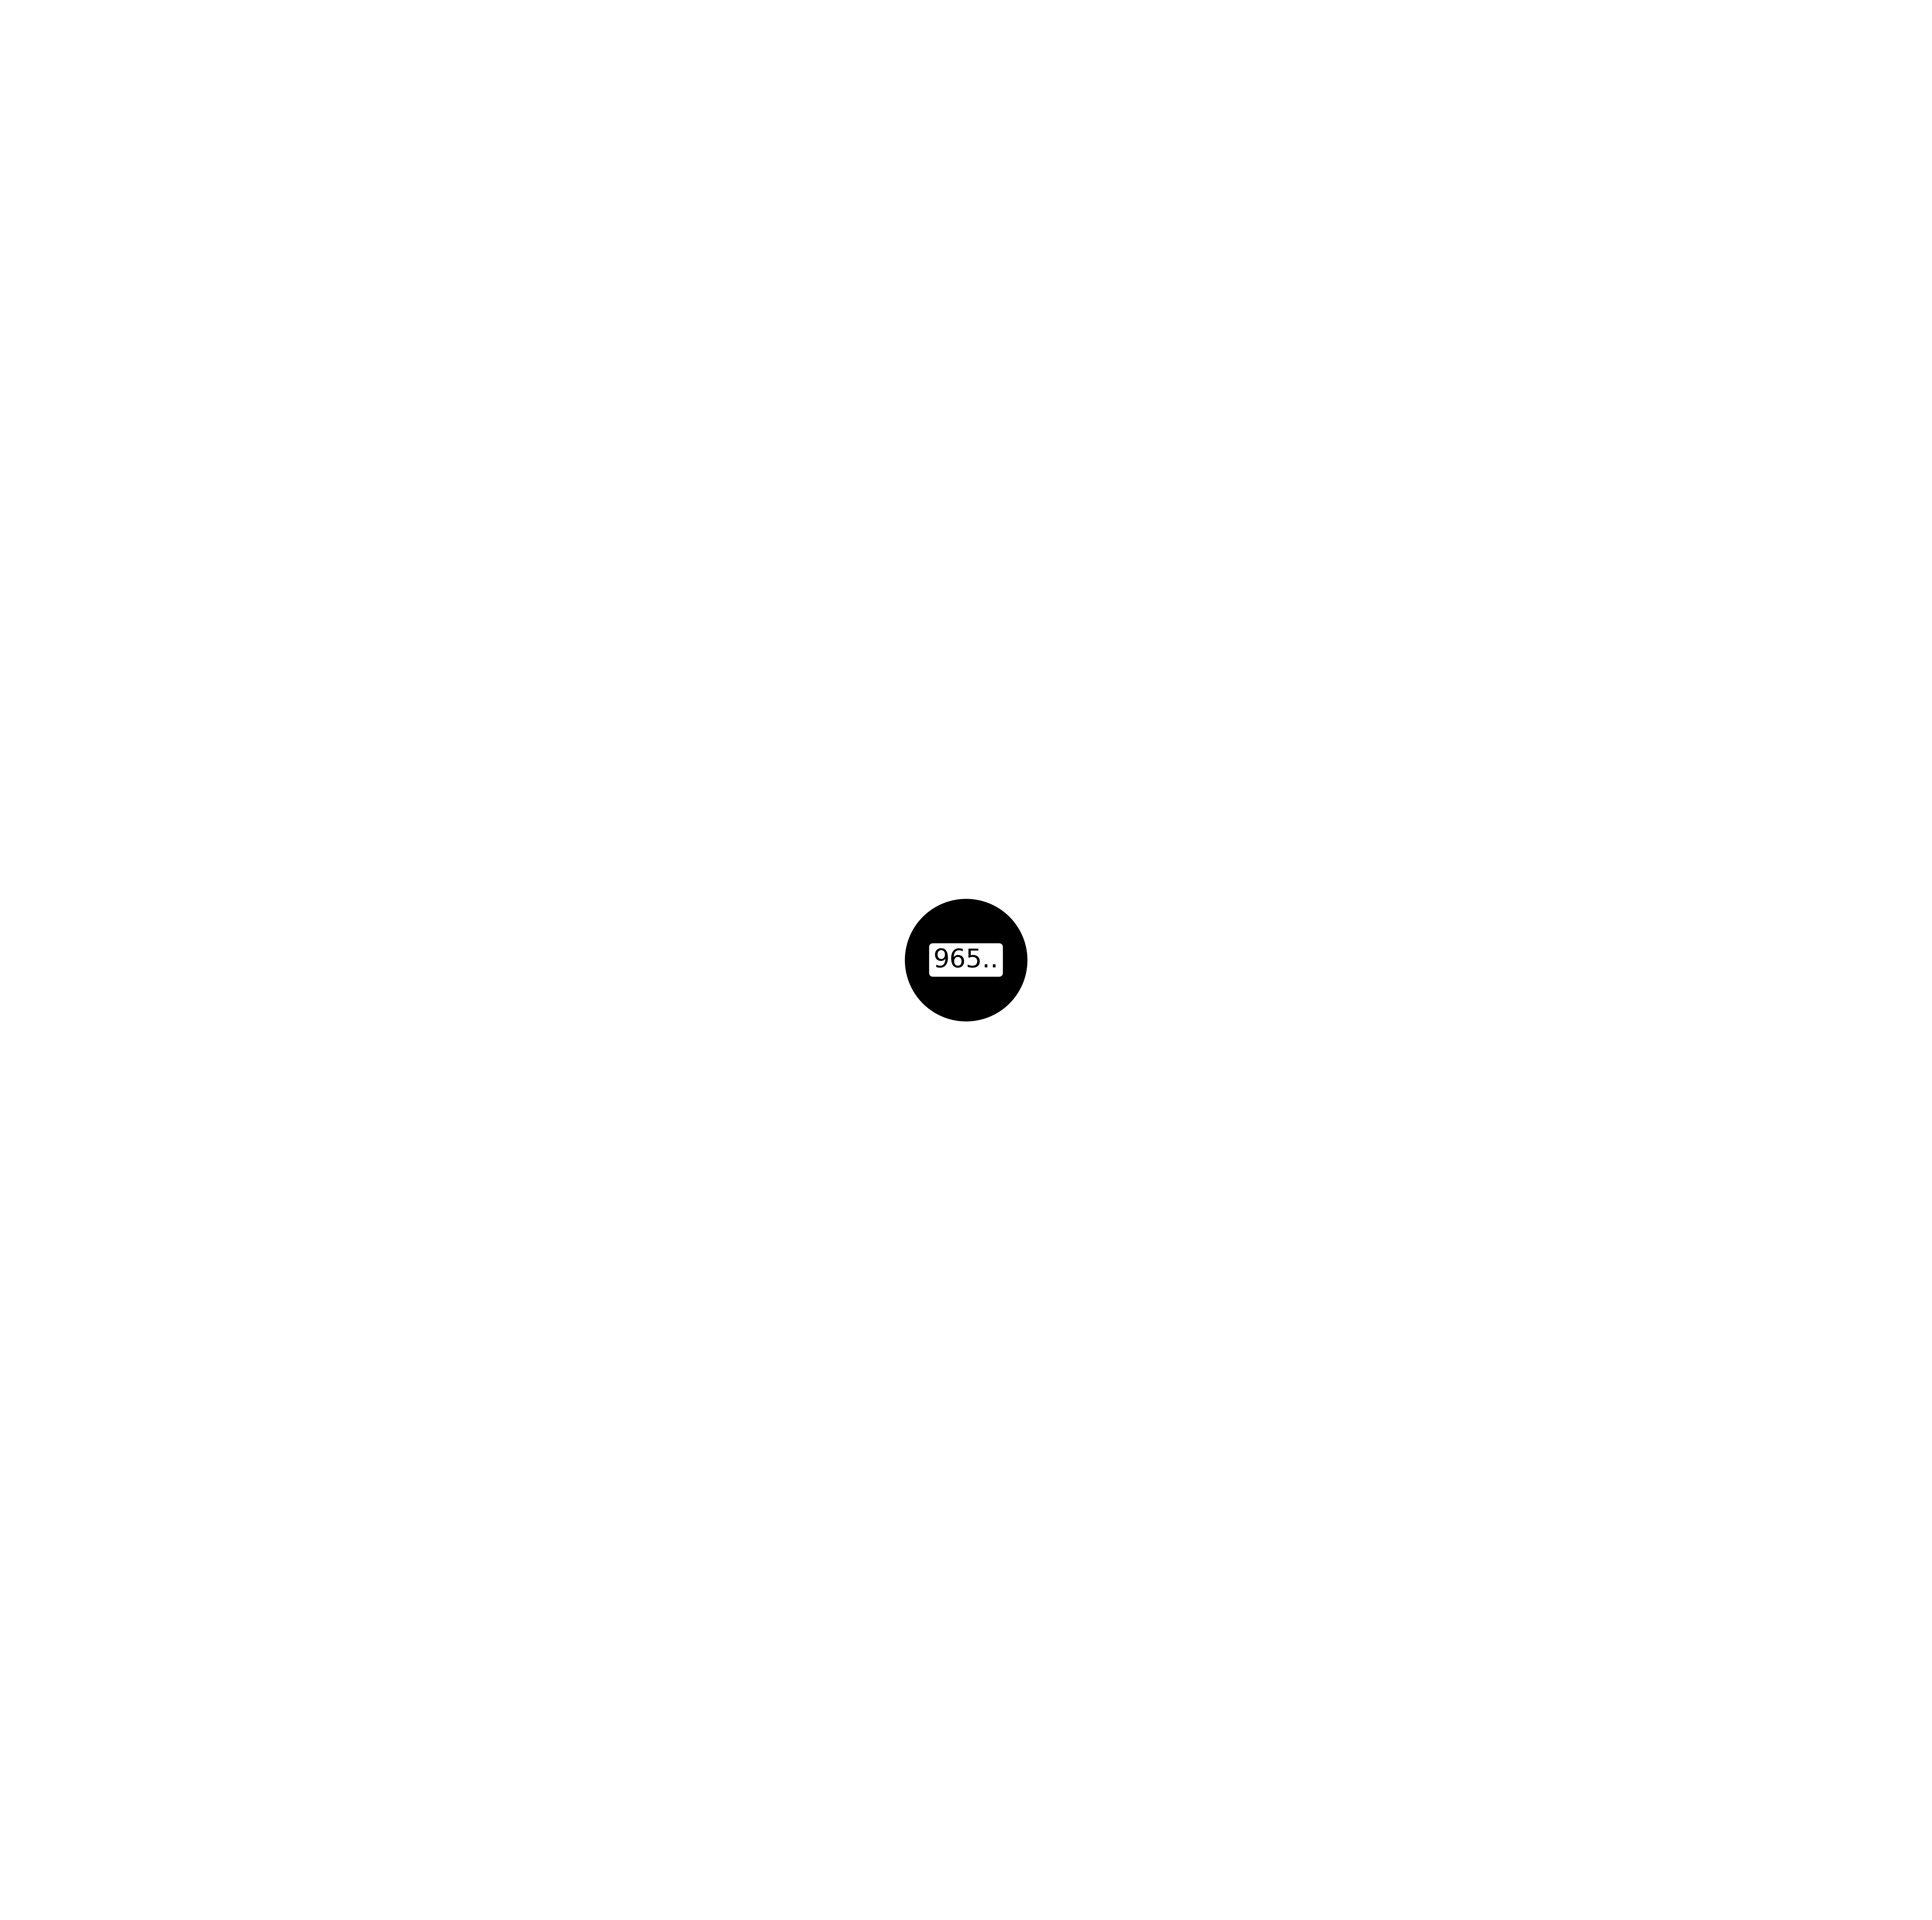

total triplets:  20
Left elements:  0


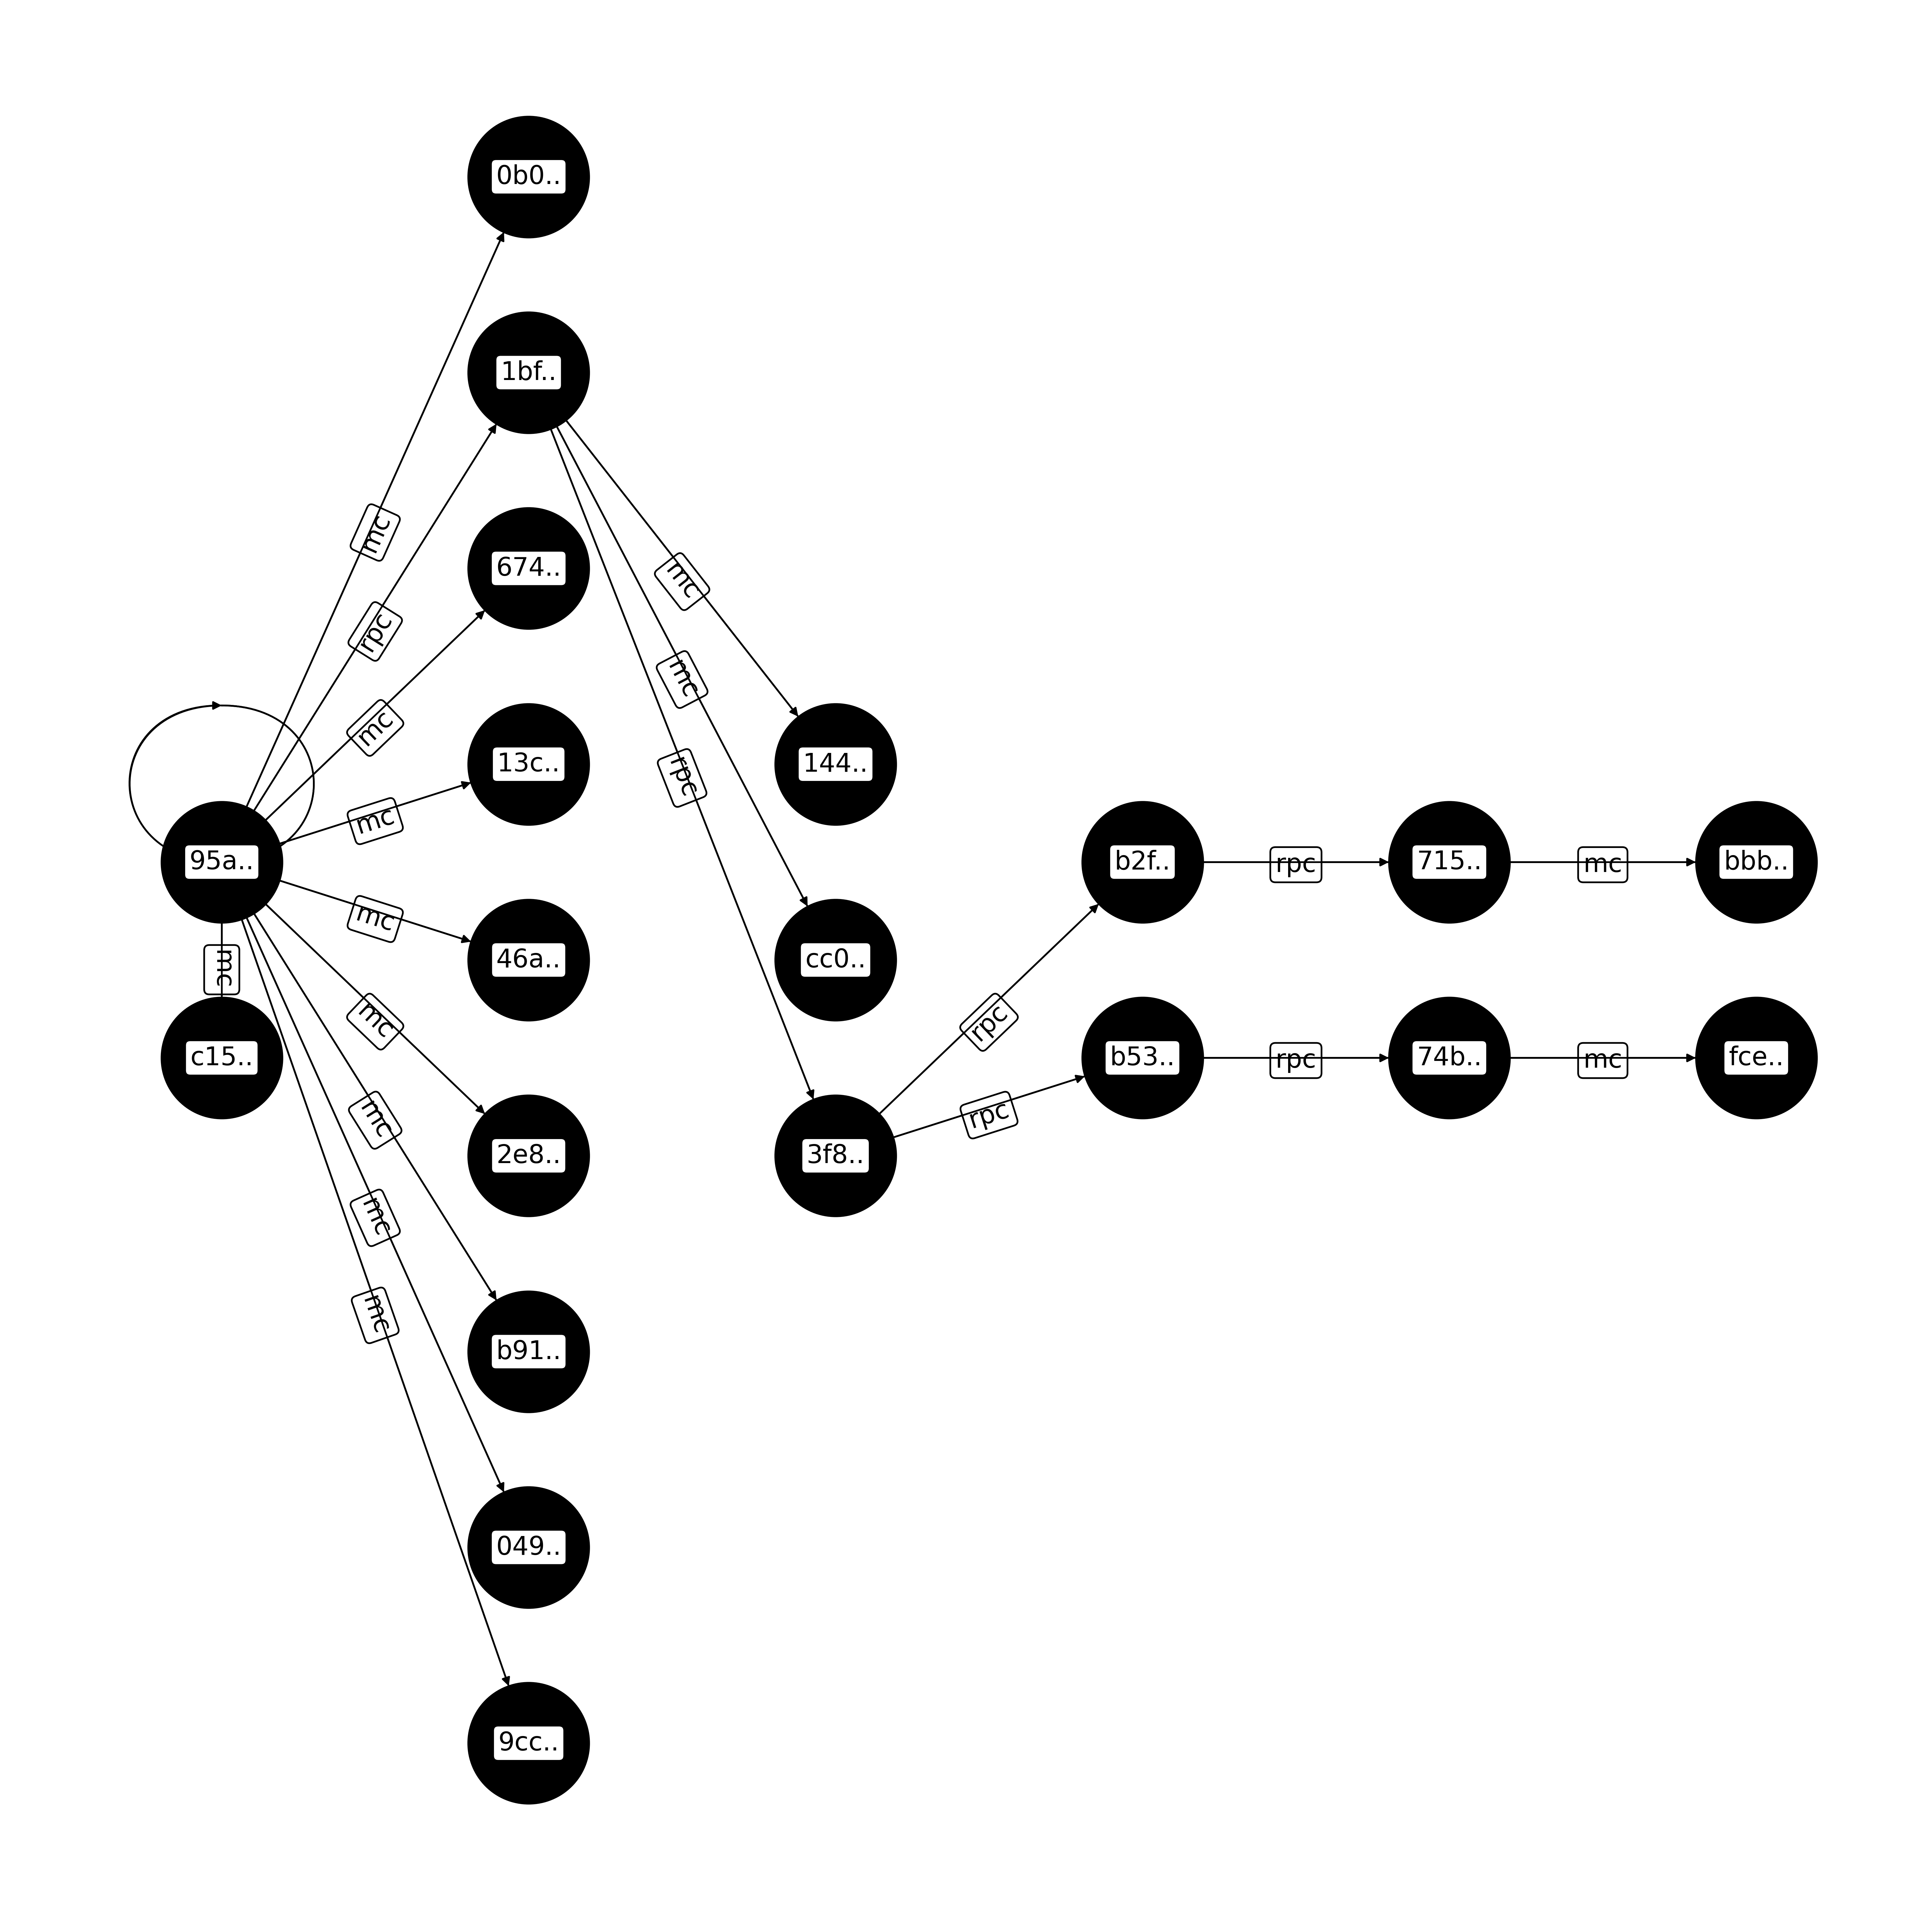

total triplets:  5
Left elements:  0


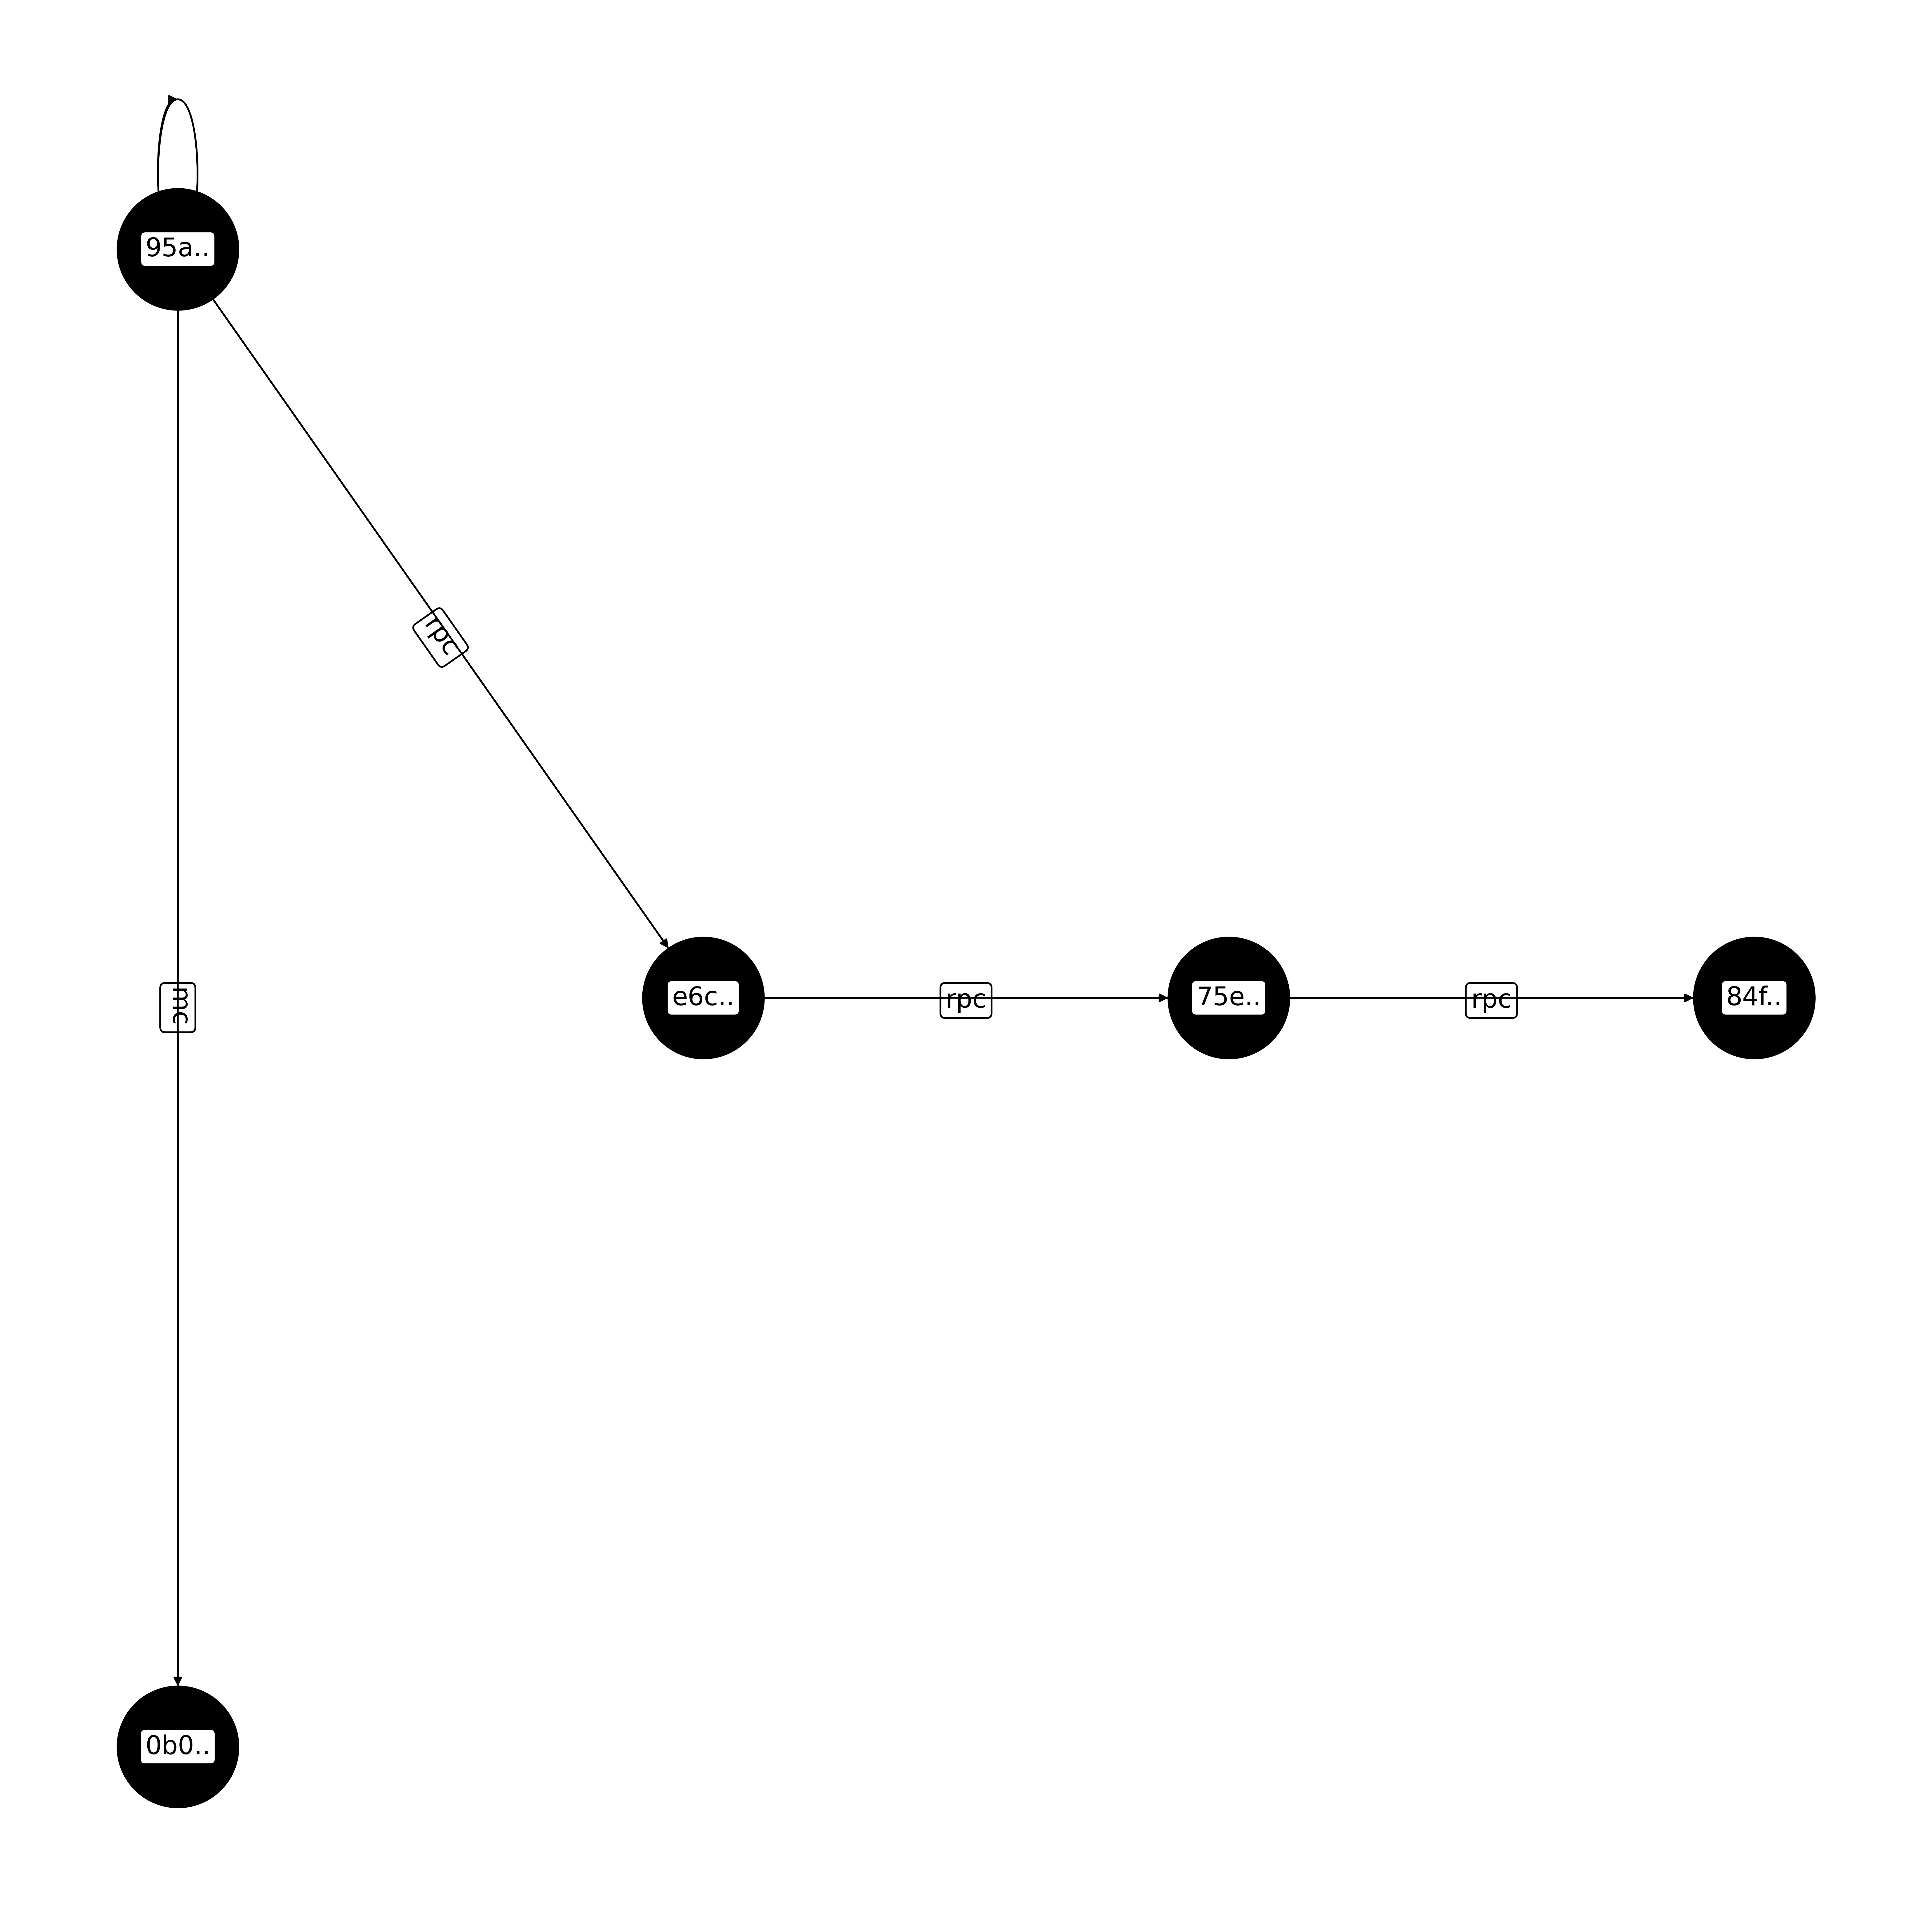

total triplets:  19
Left elements:  6


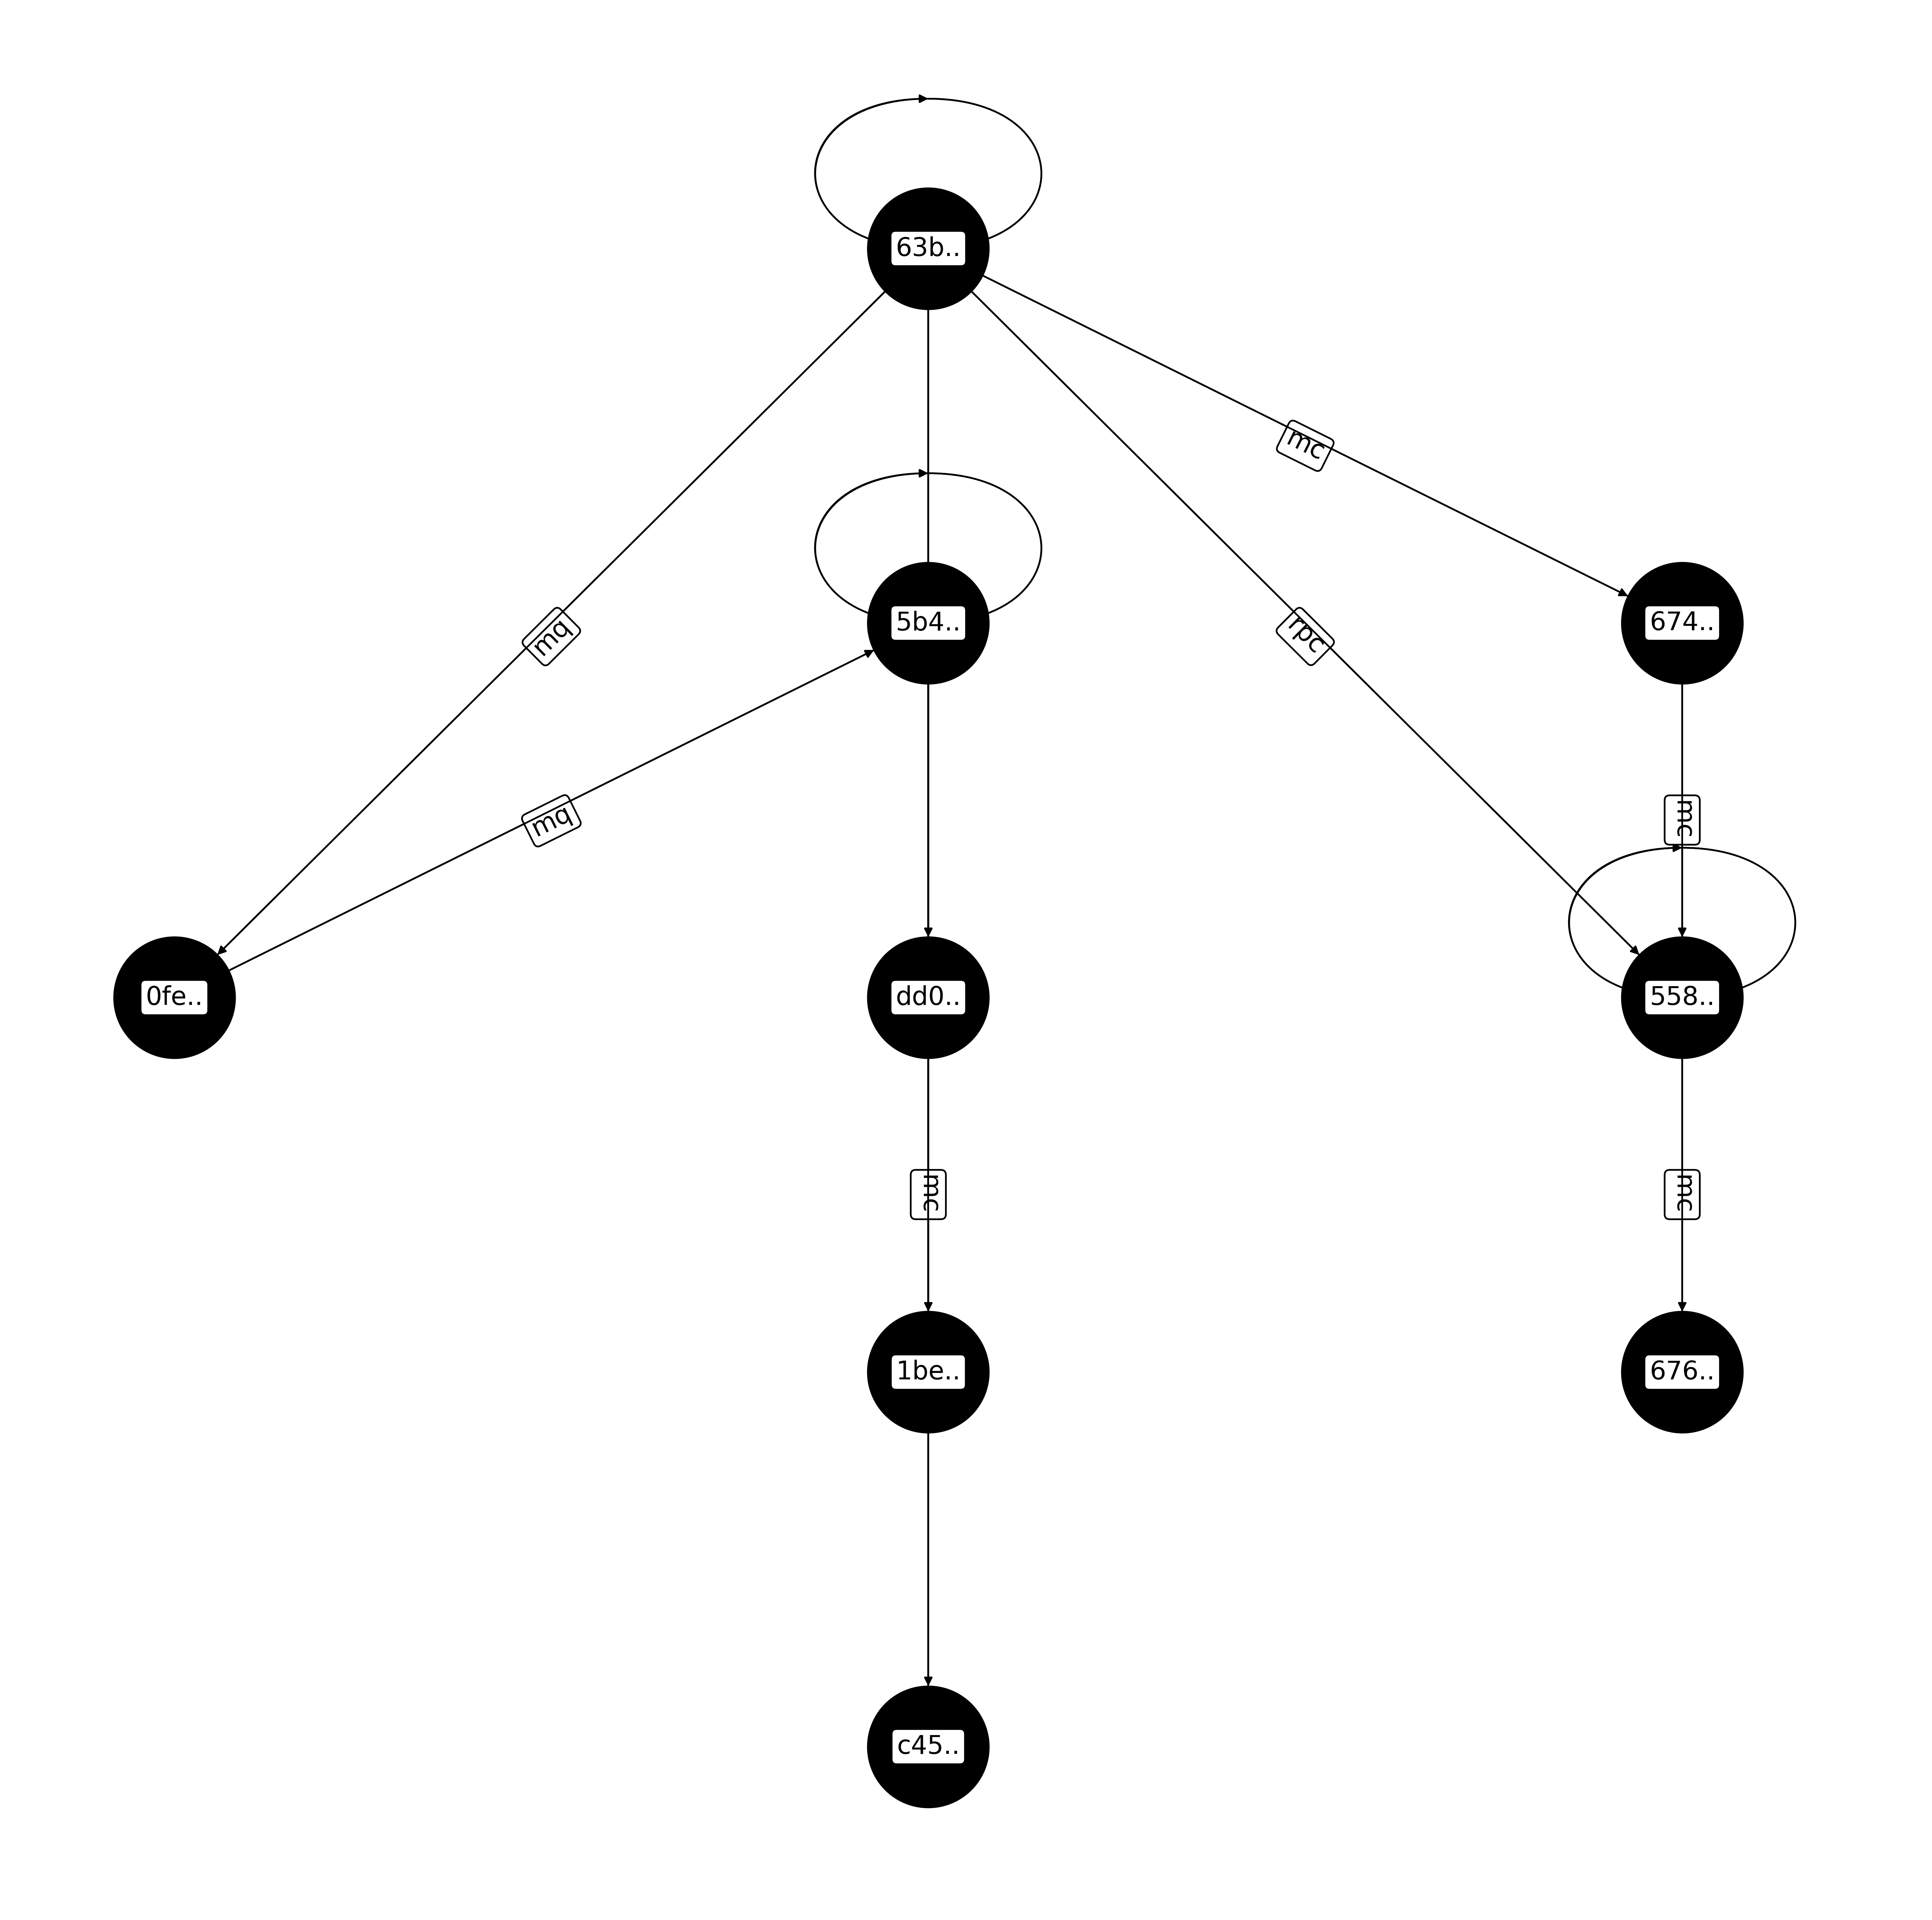

total triplets:  3
Left elements:  0


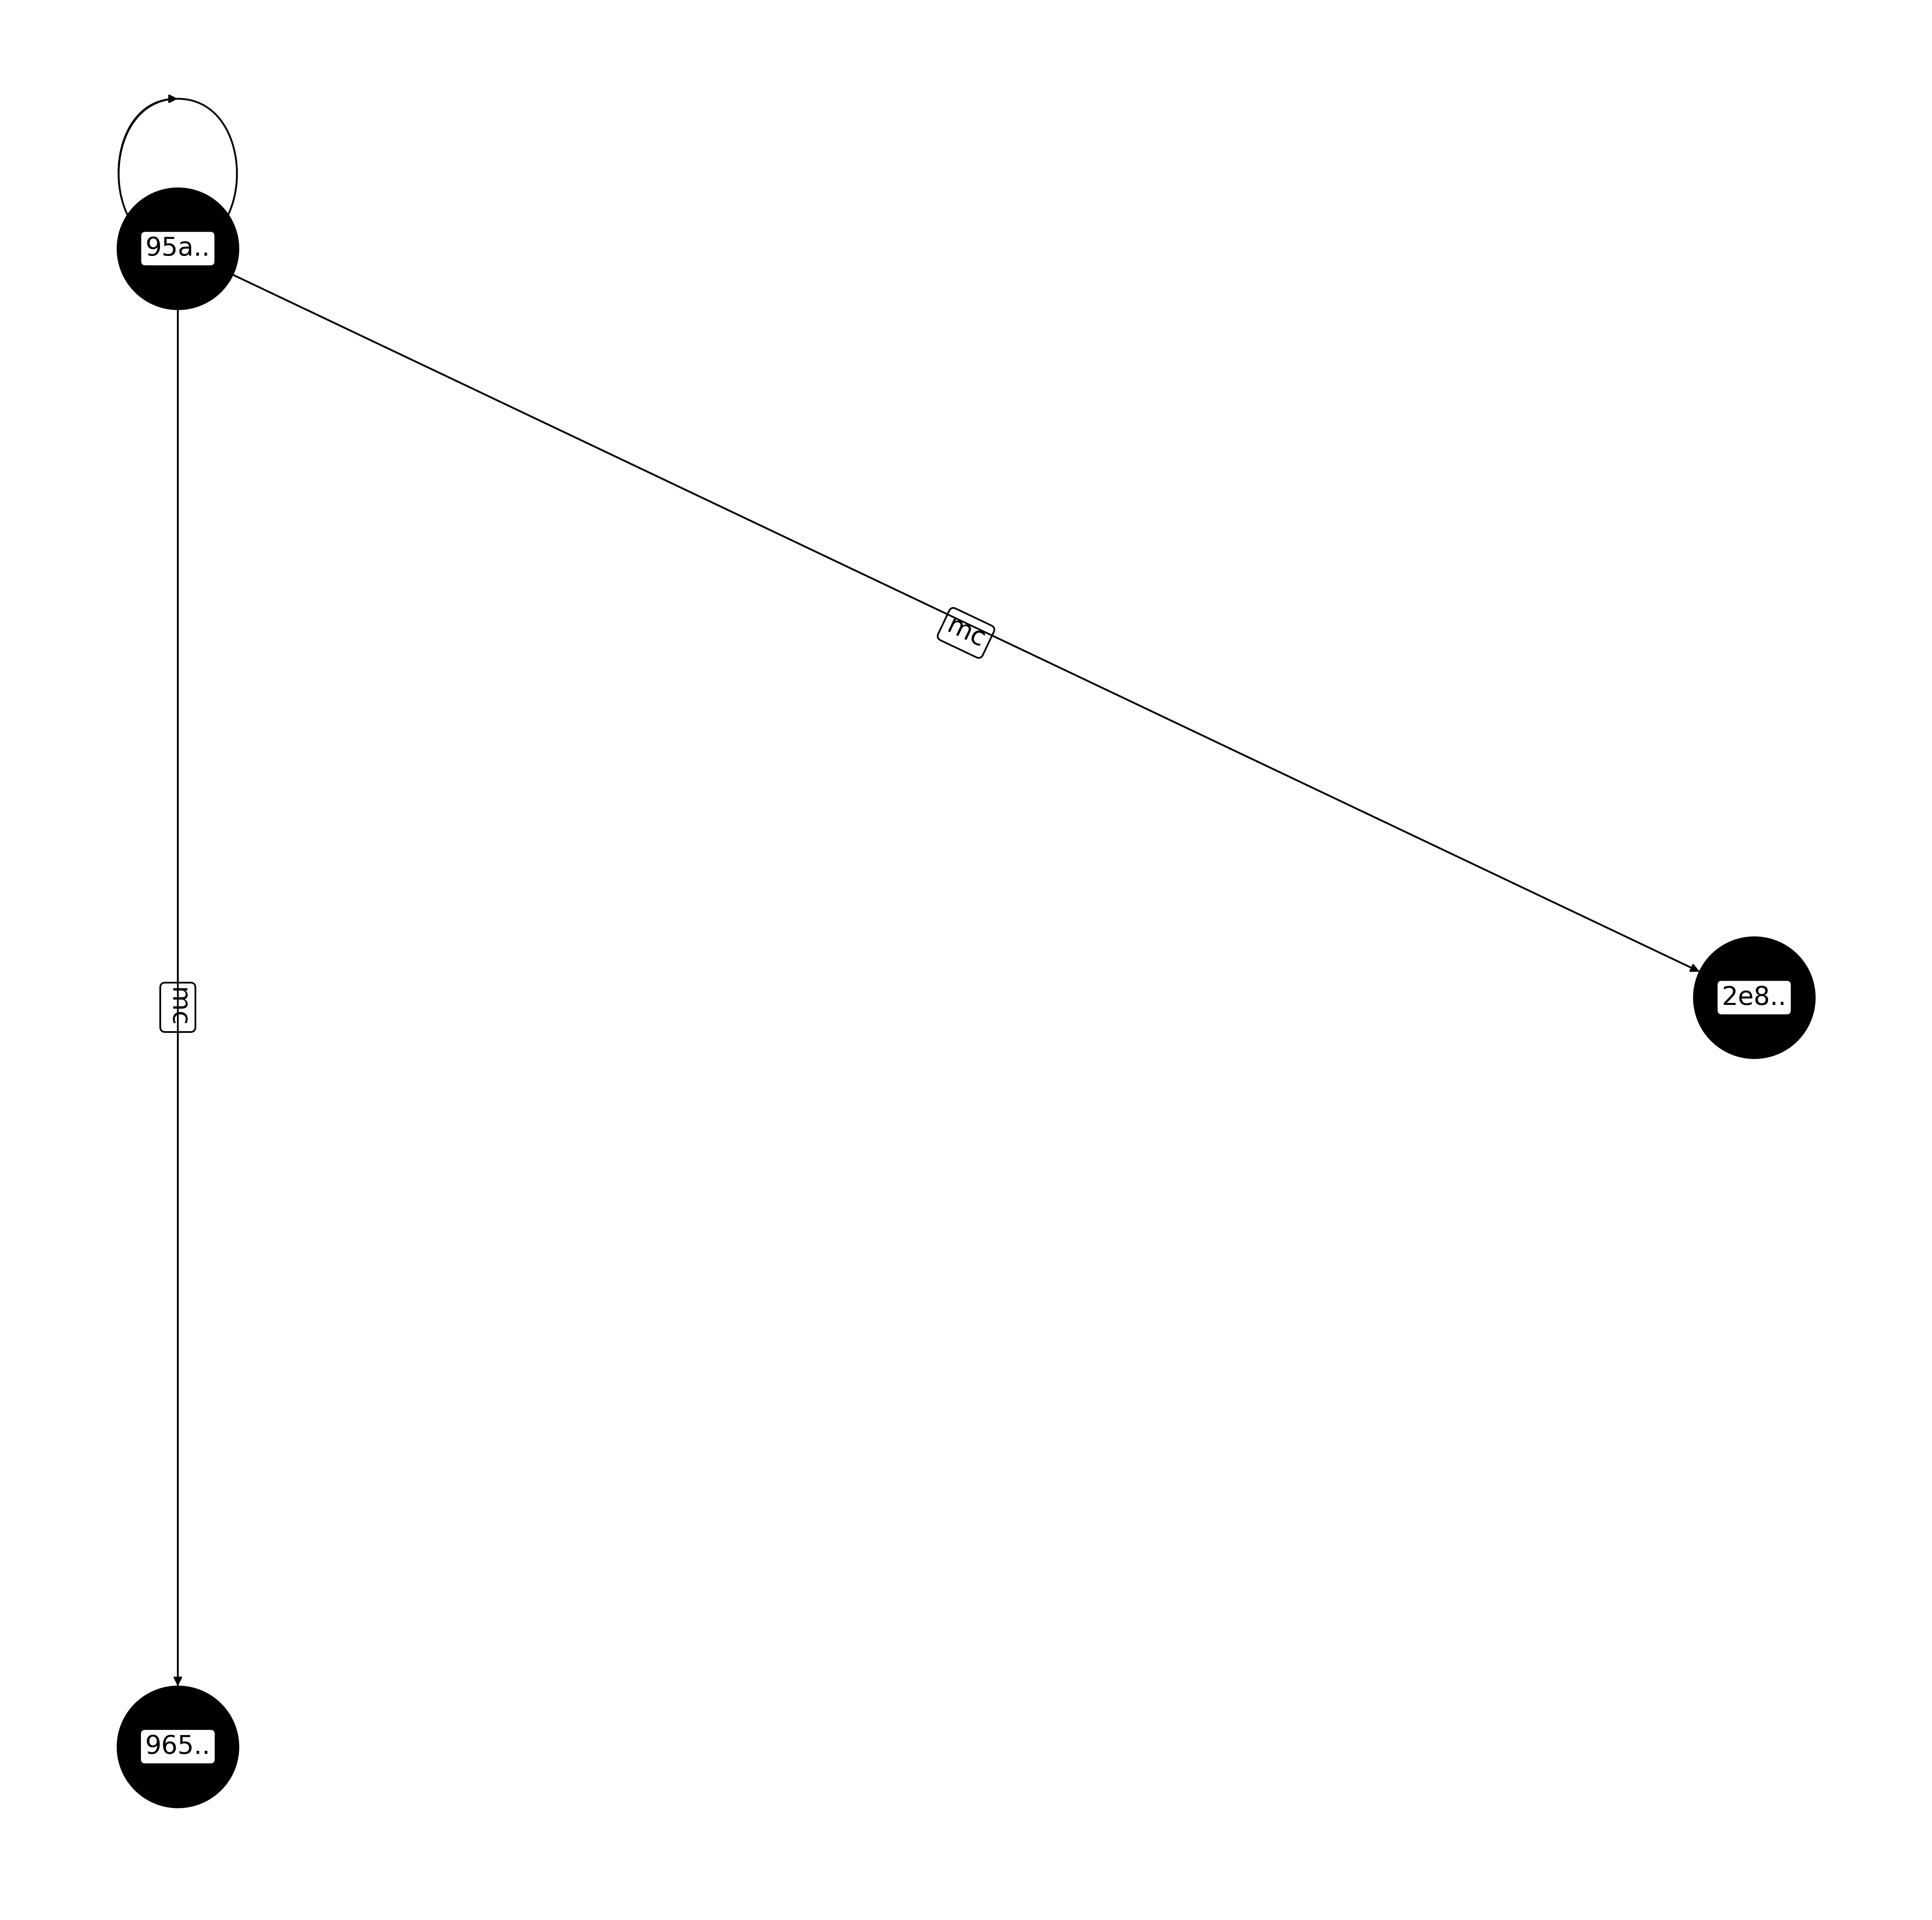

total triplets:  2
Left elements:  0


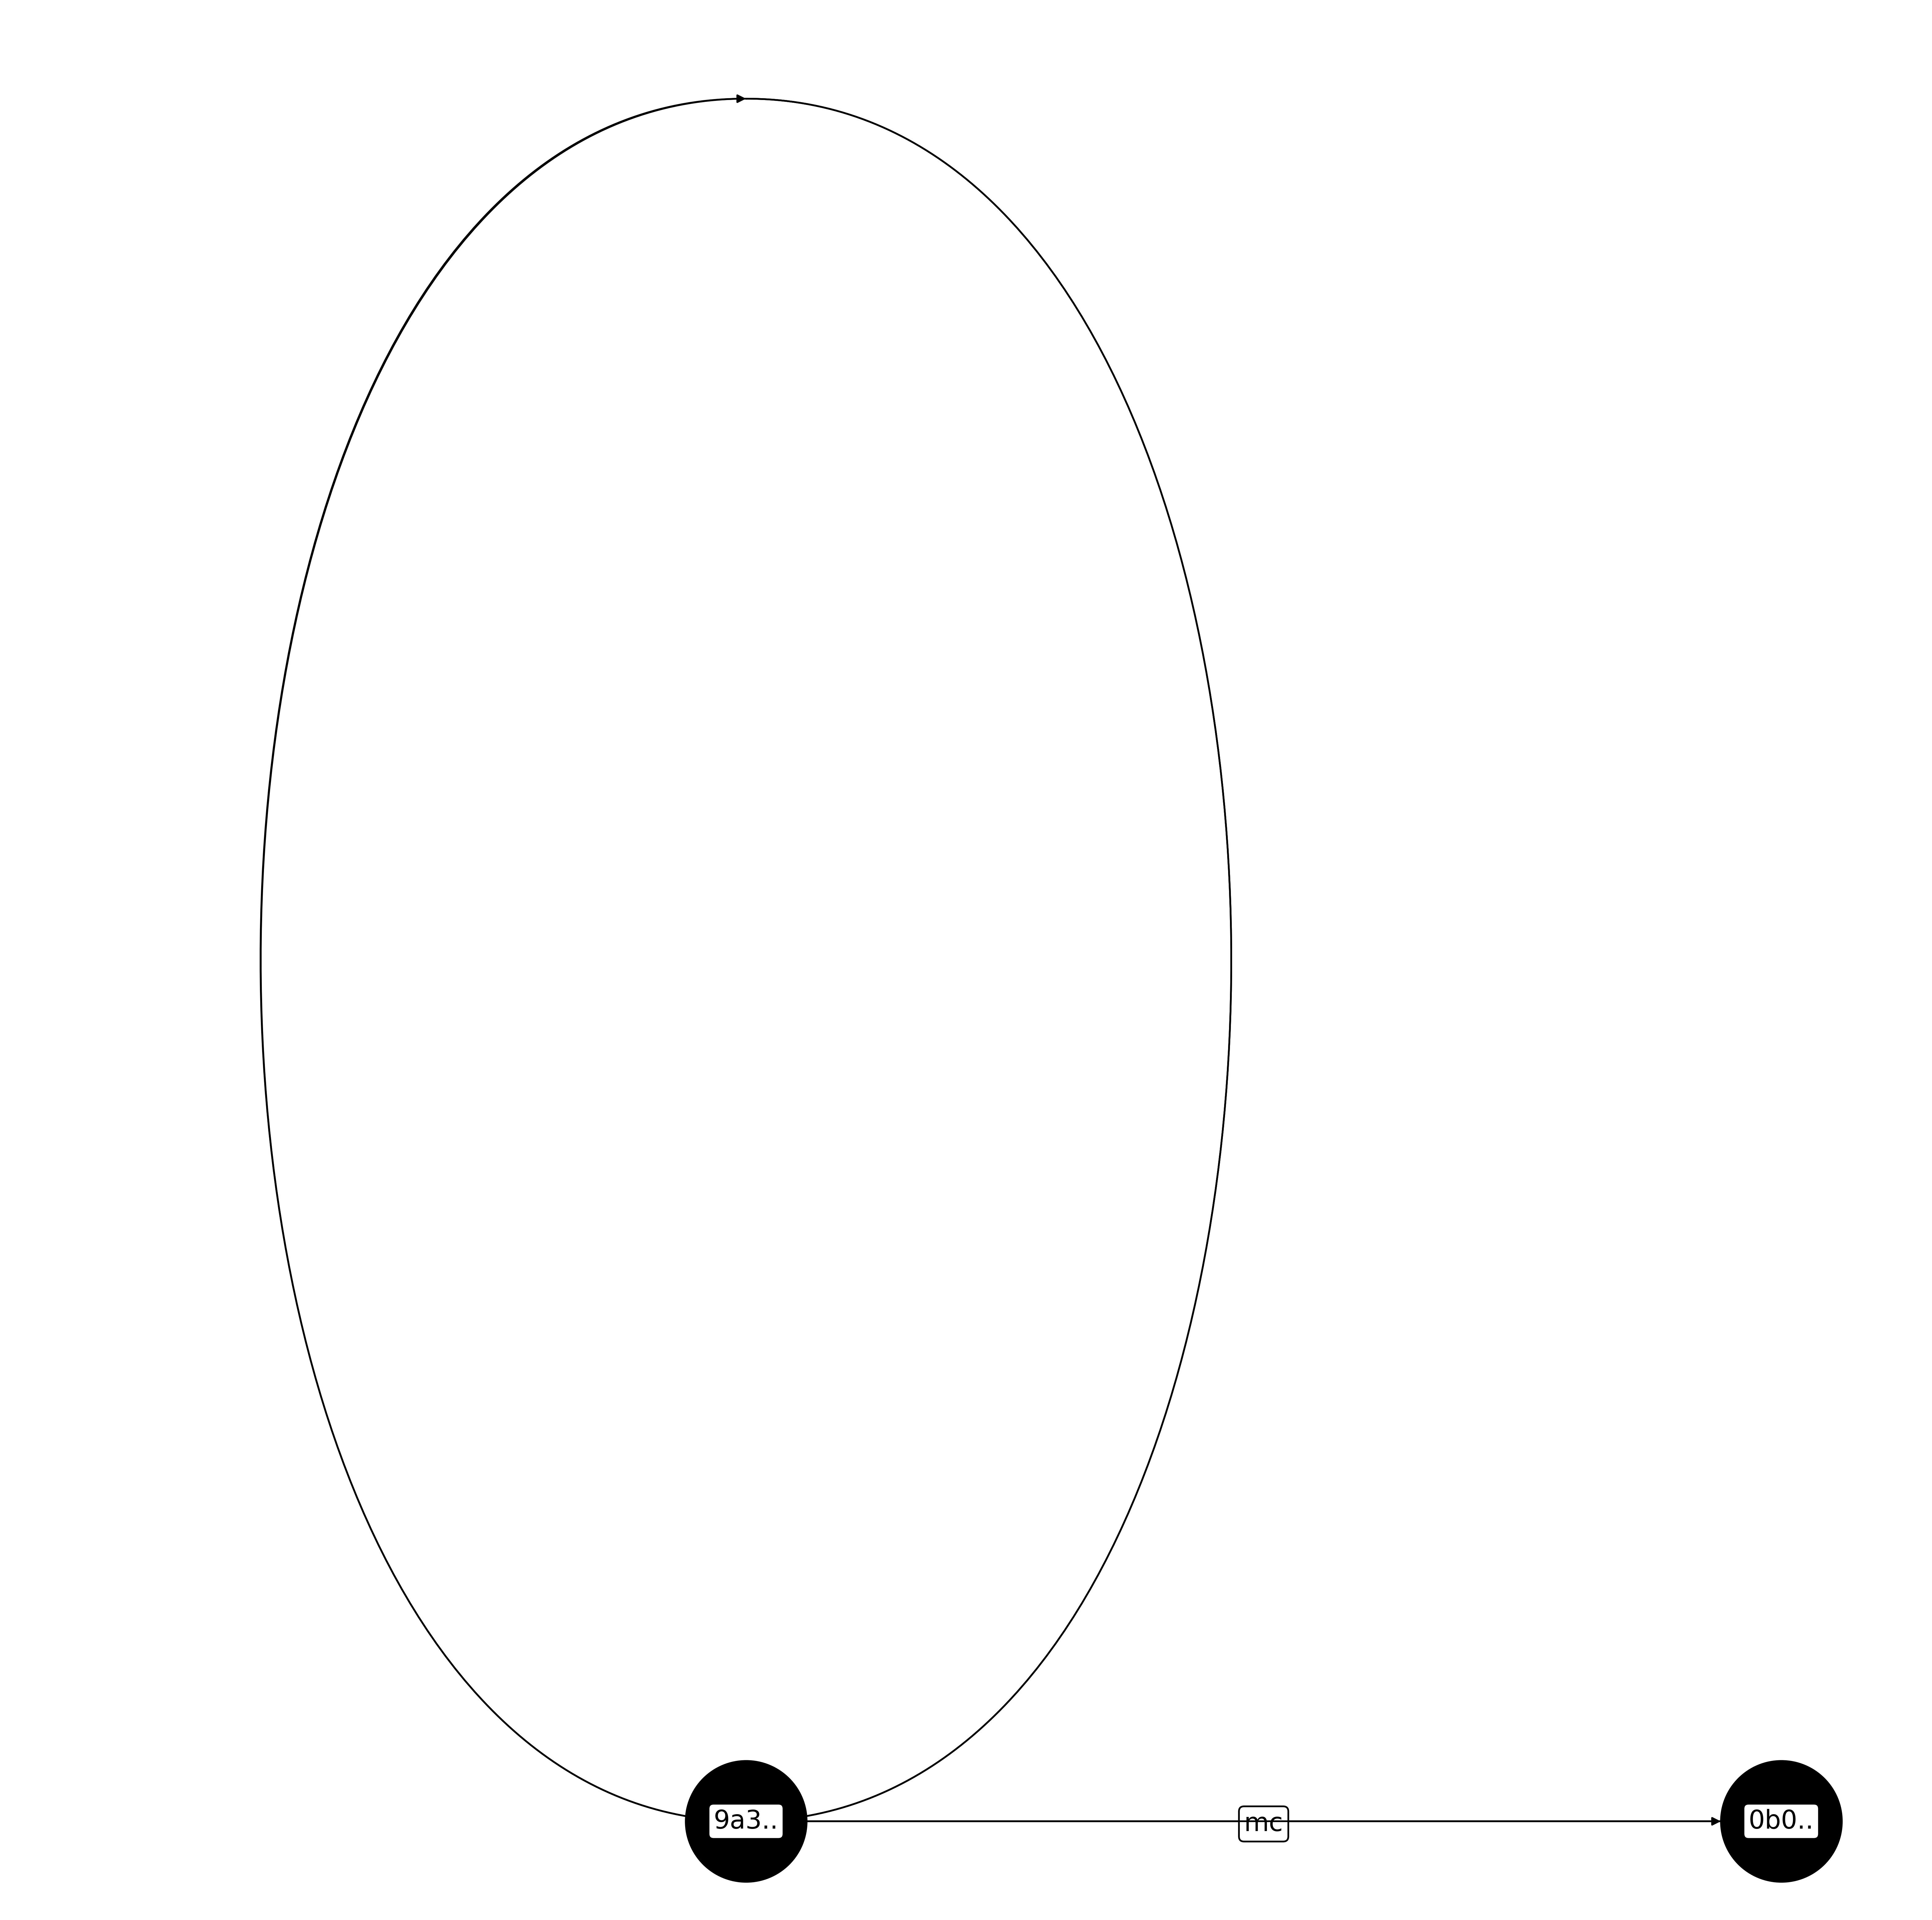

total triplets:  3
Left elements:  0


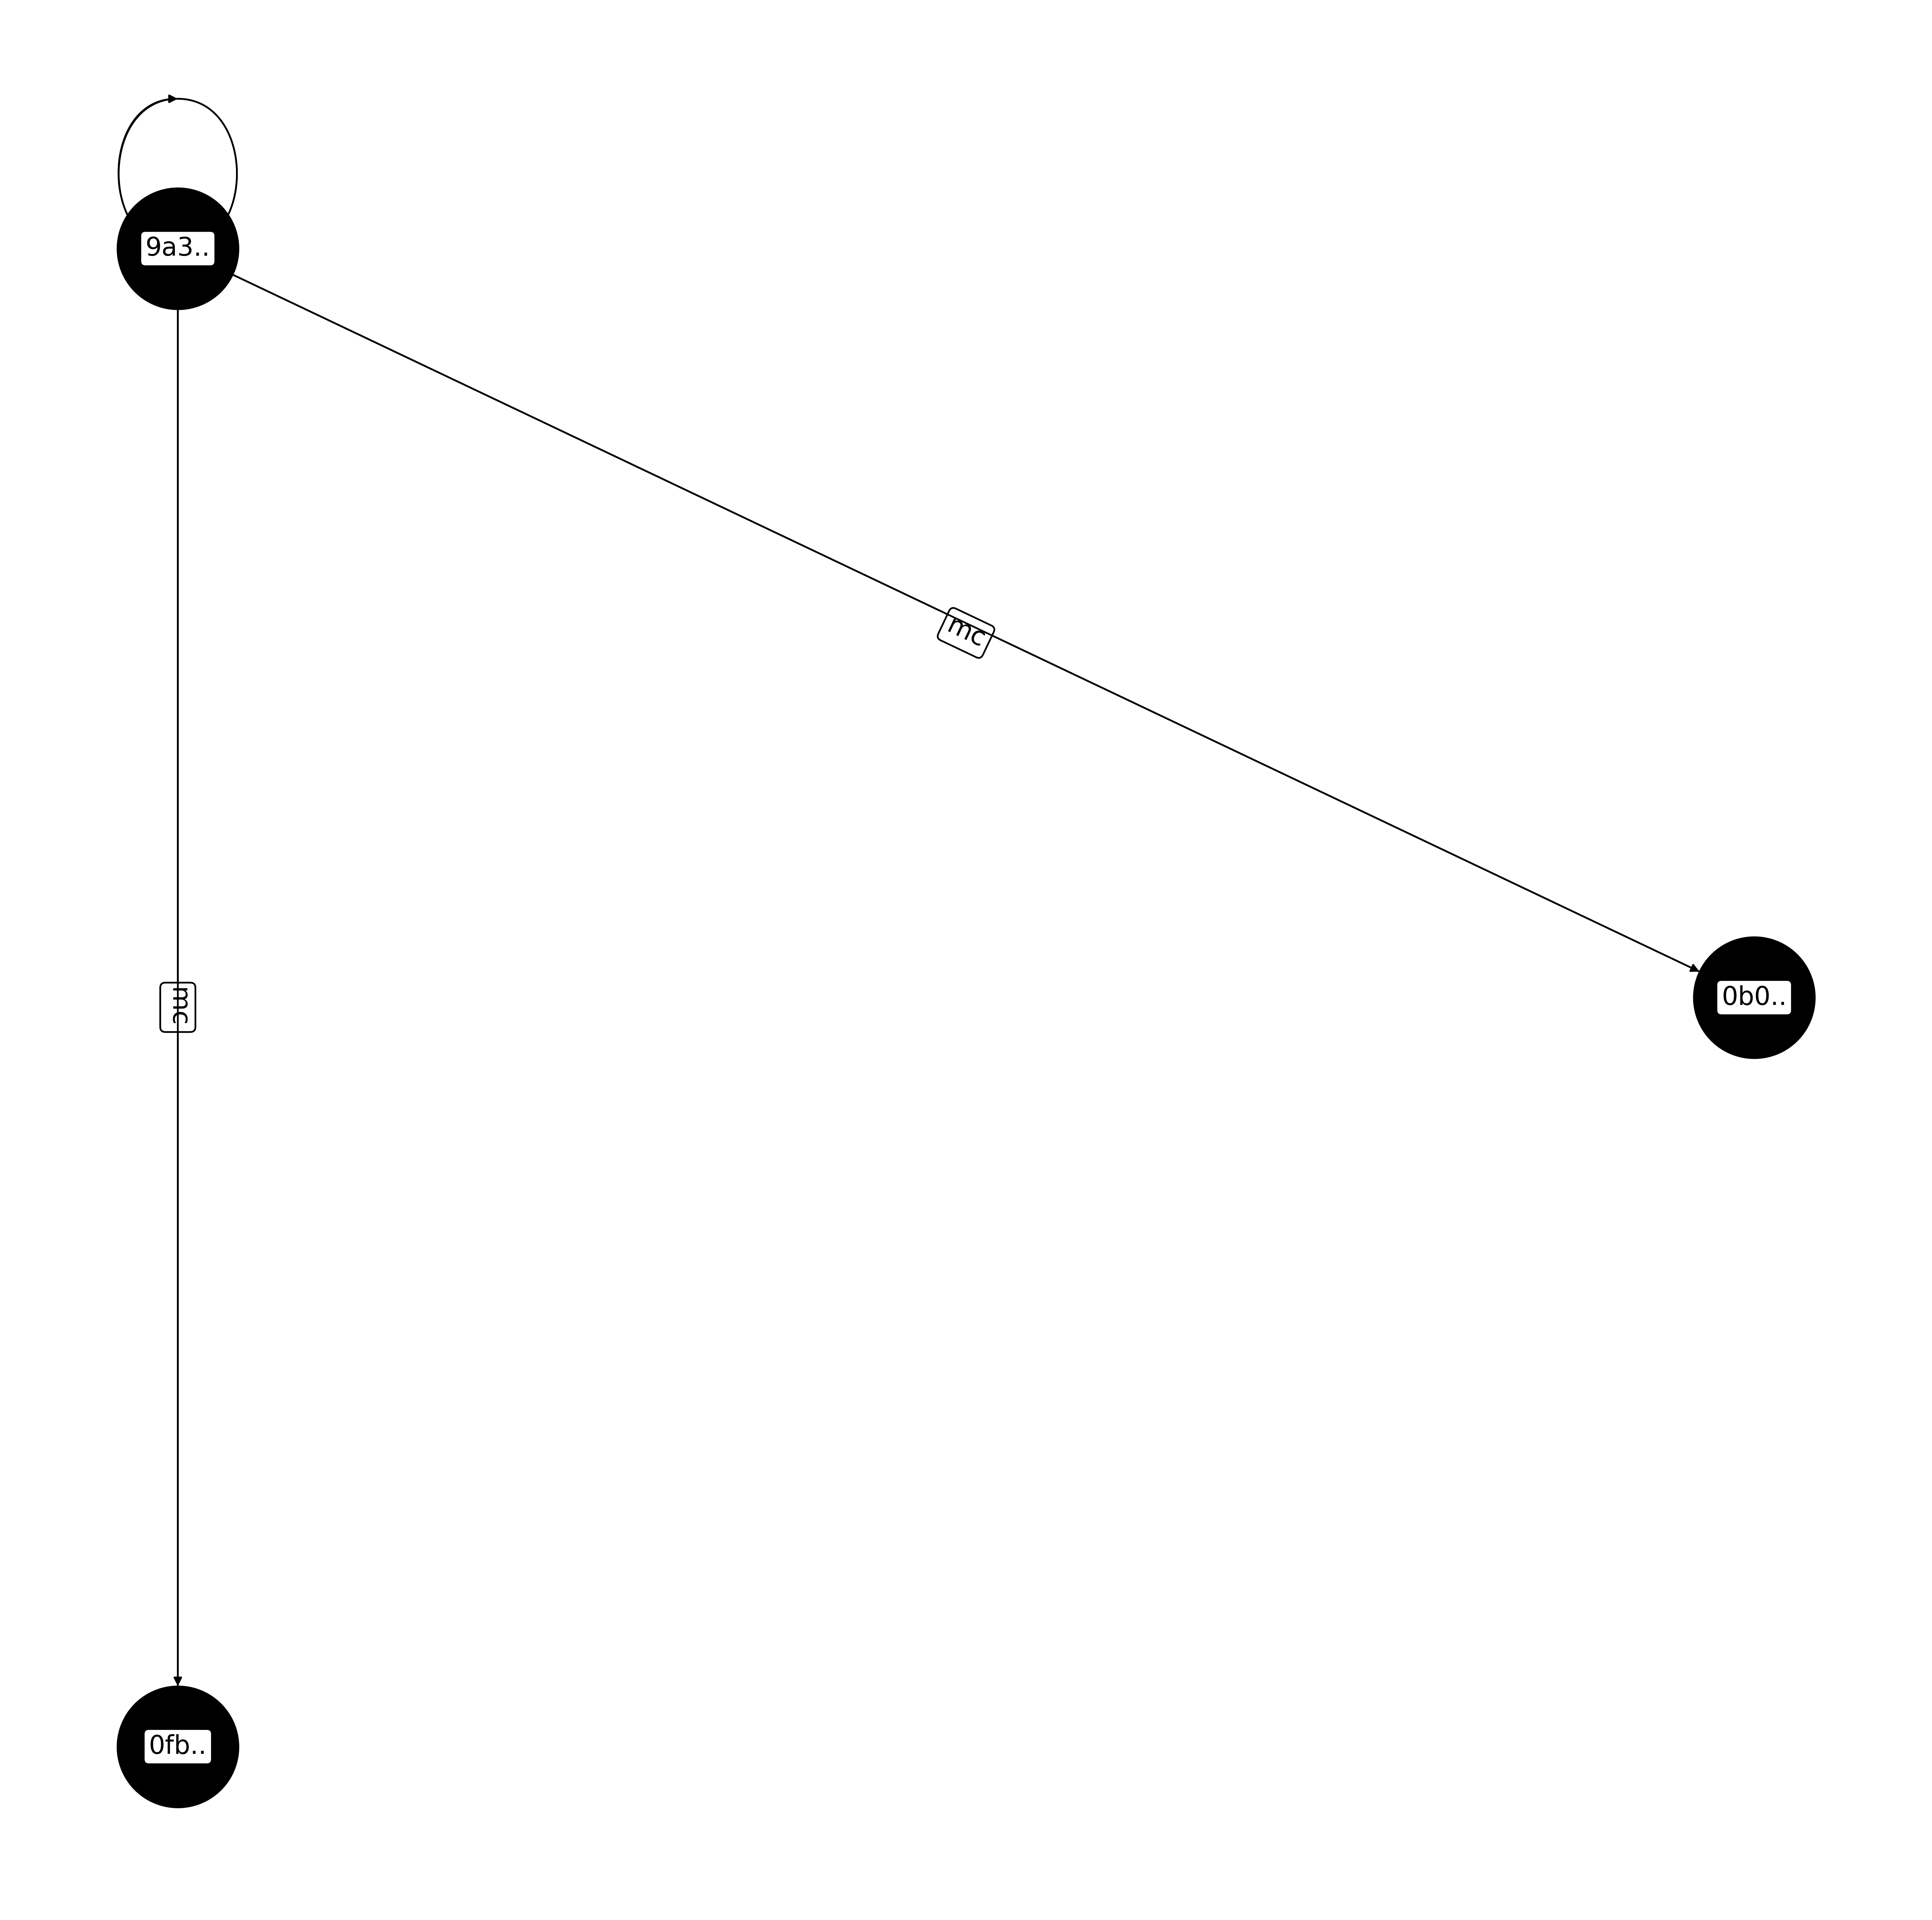

total triplets:  3
Left elements:  0


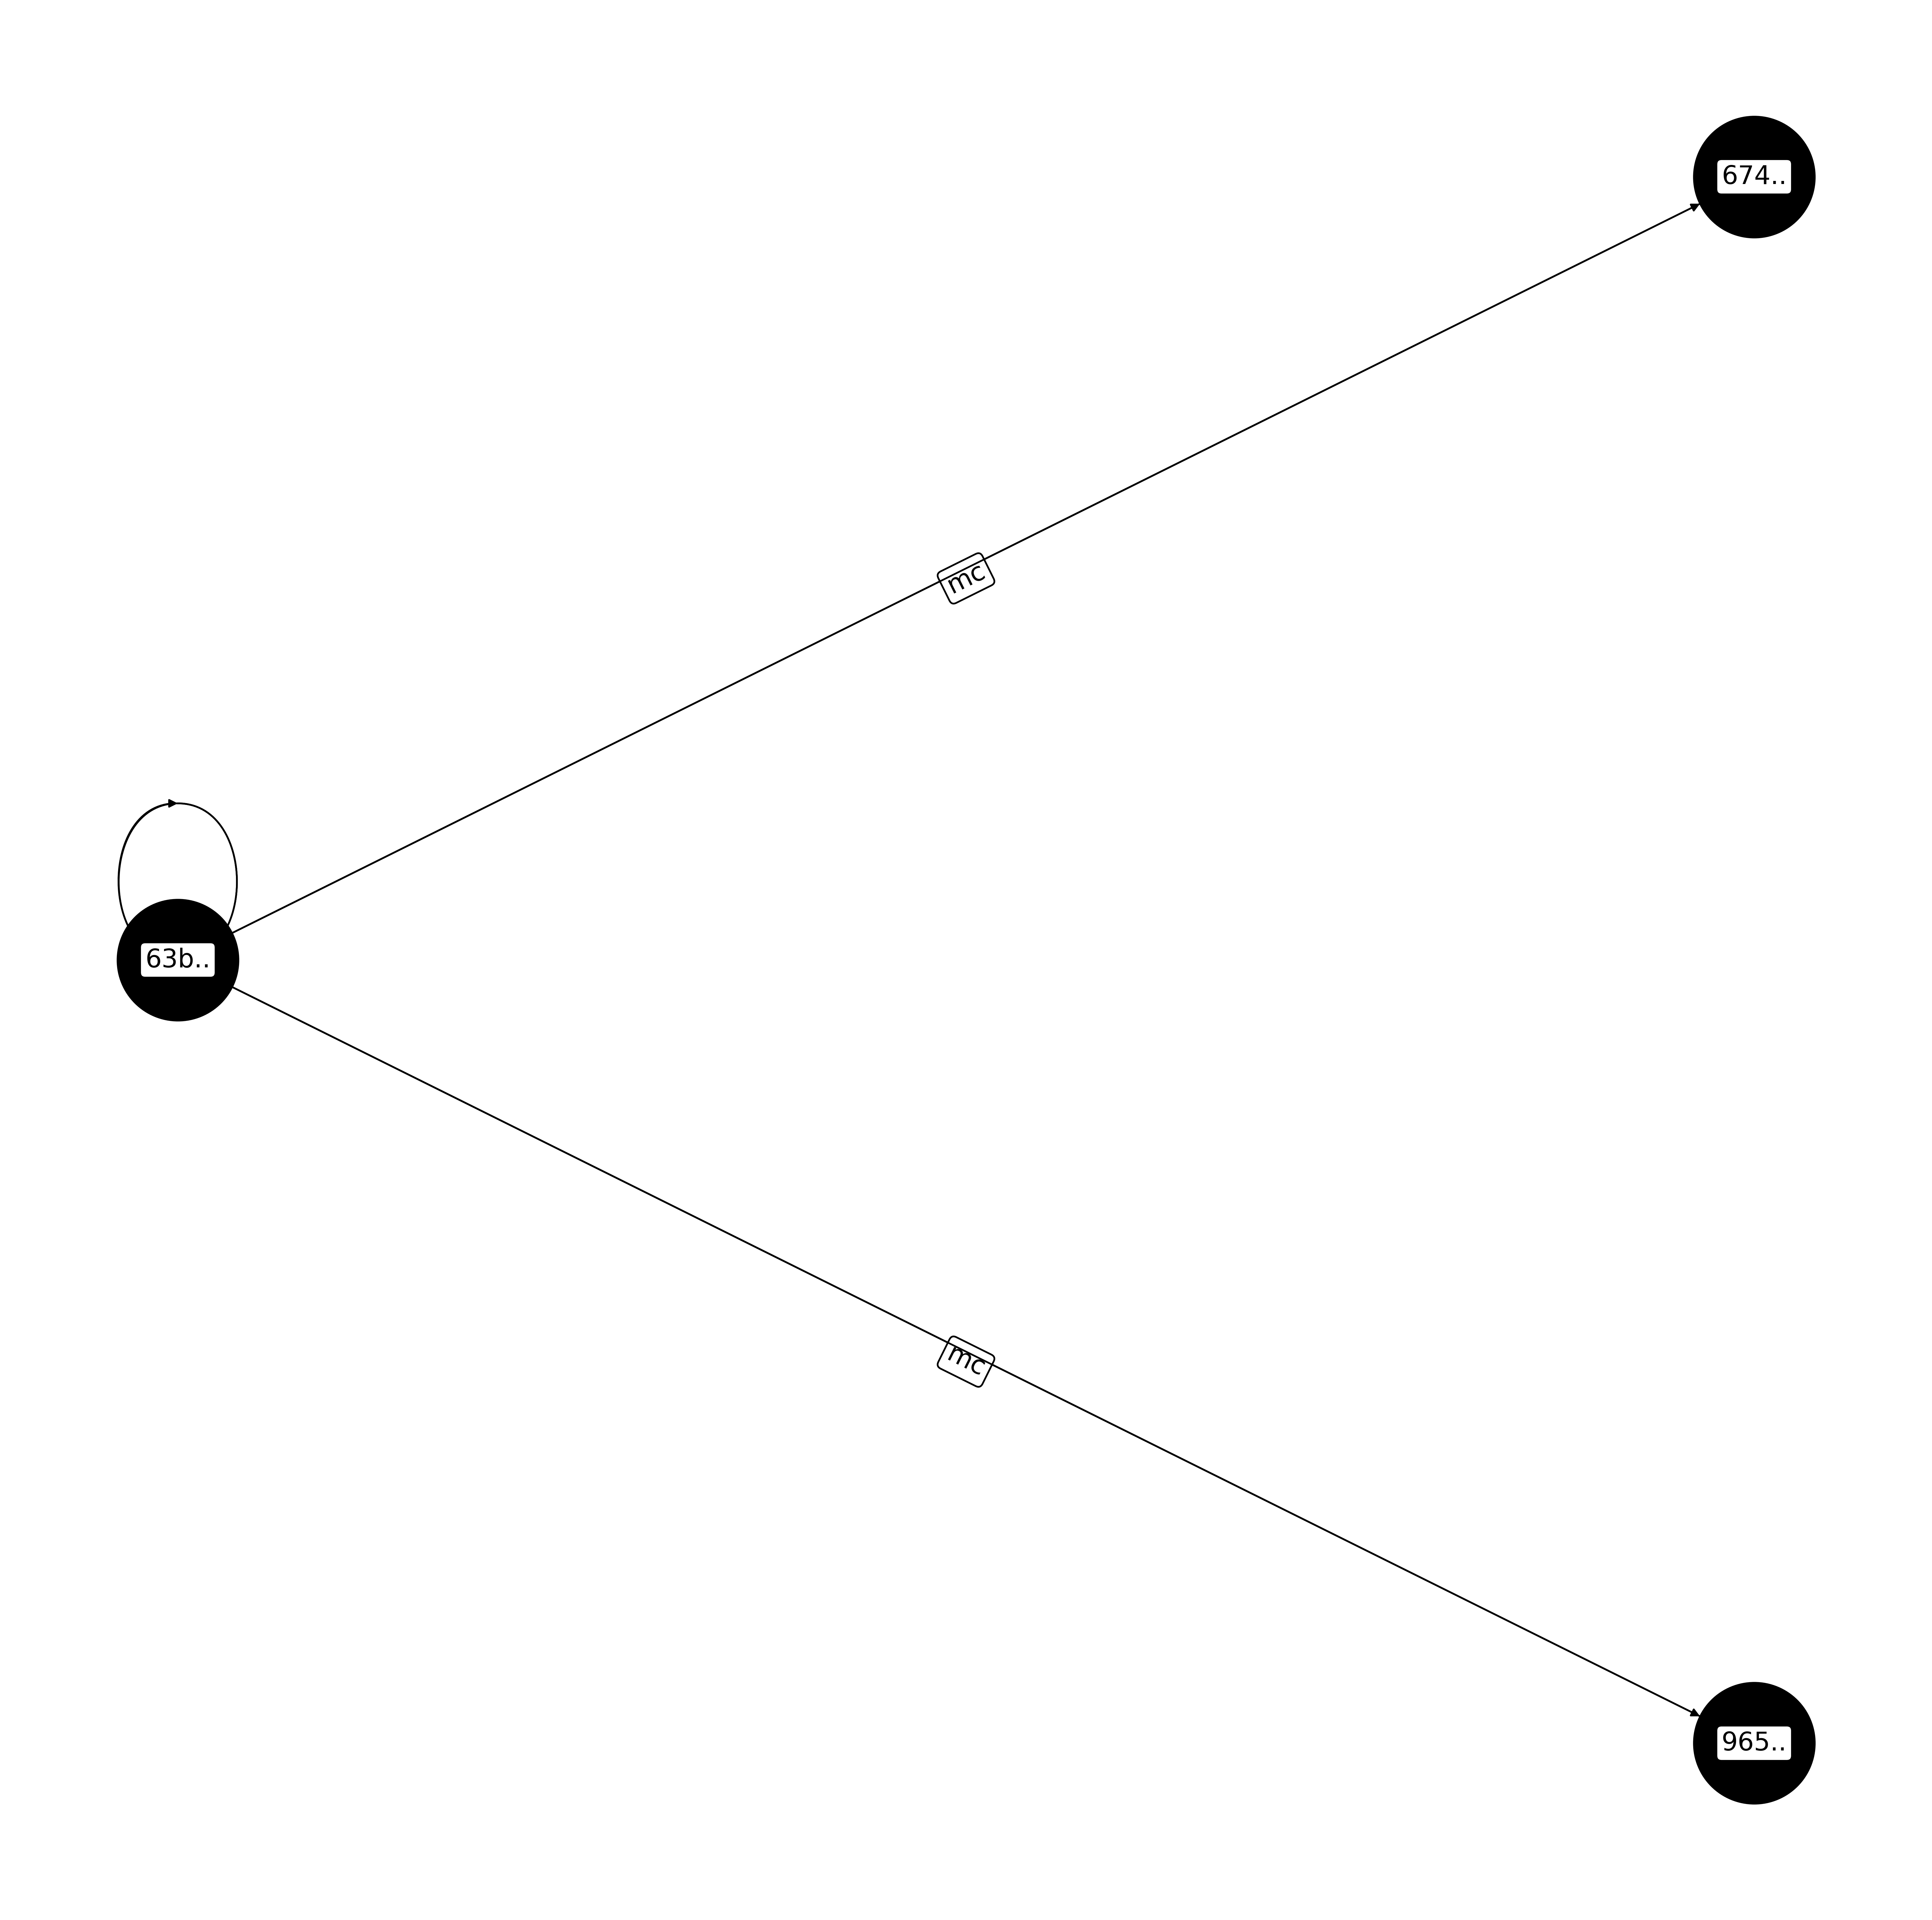

total triplets:  16
Left elements:  6


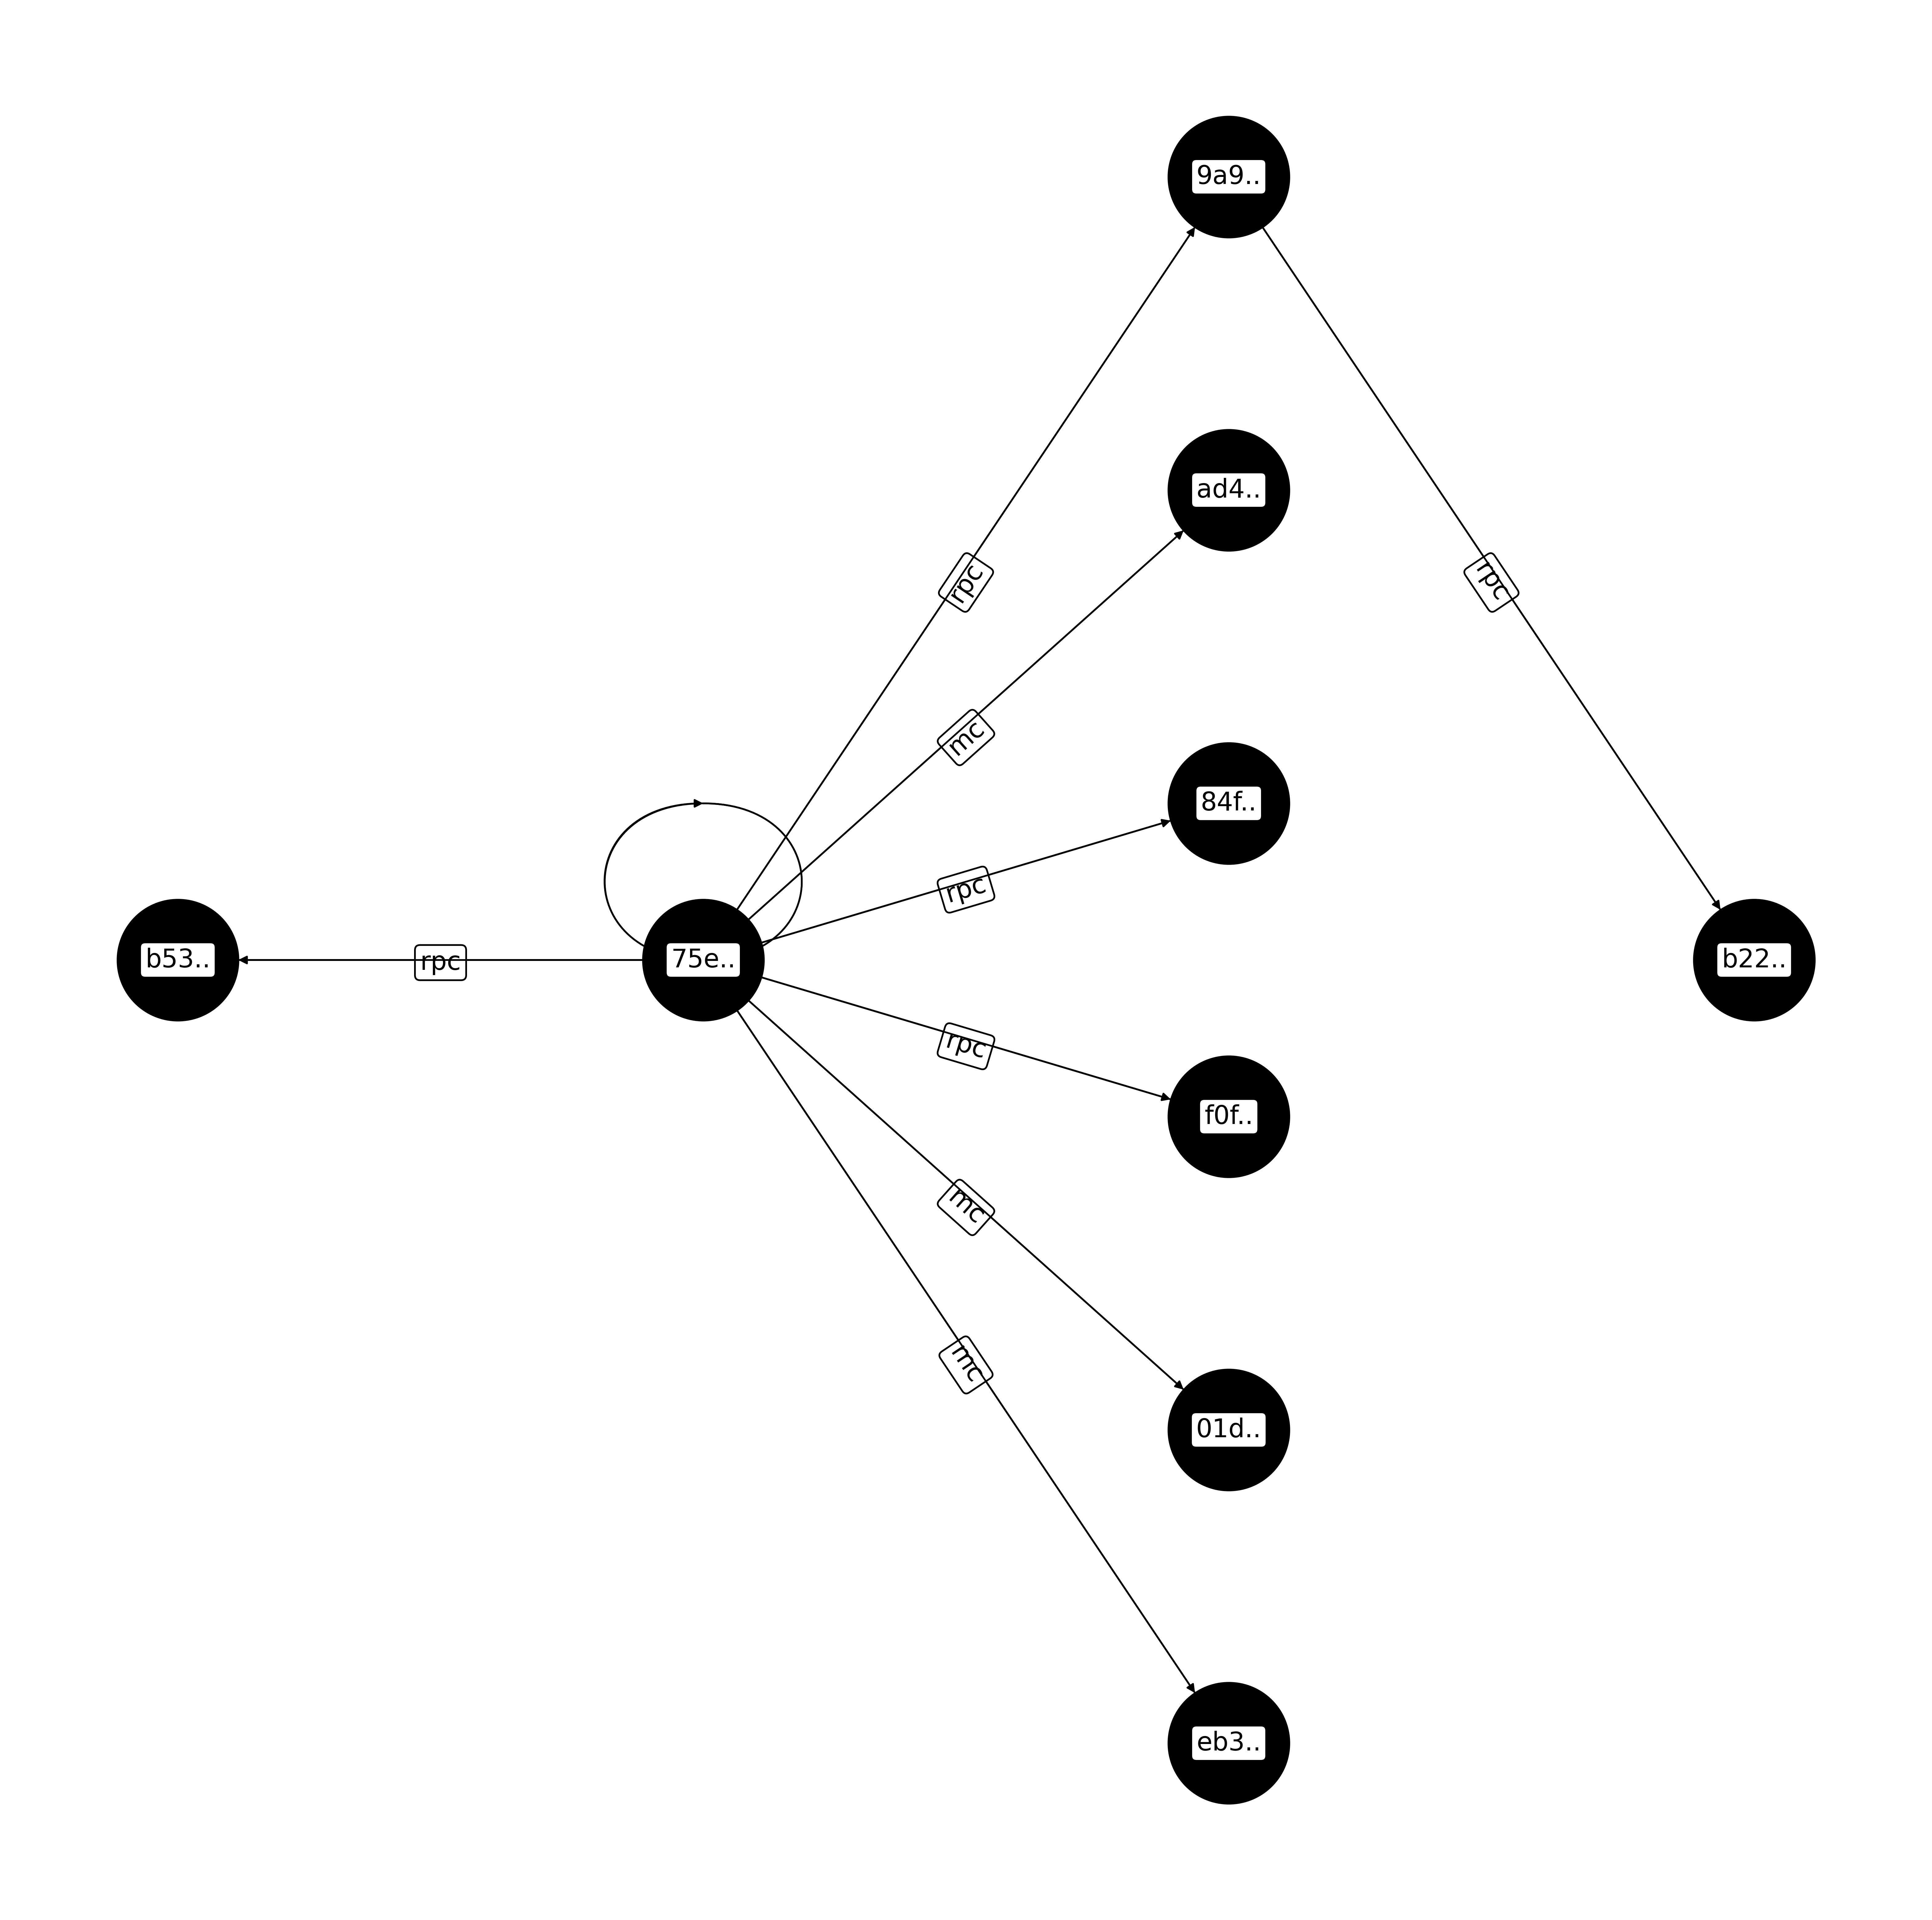

total triplets:  7
Left elements:  0


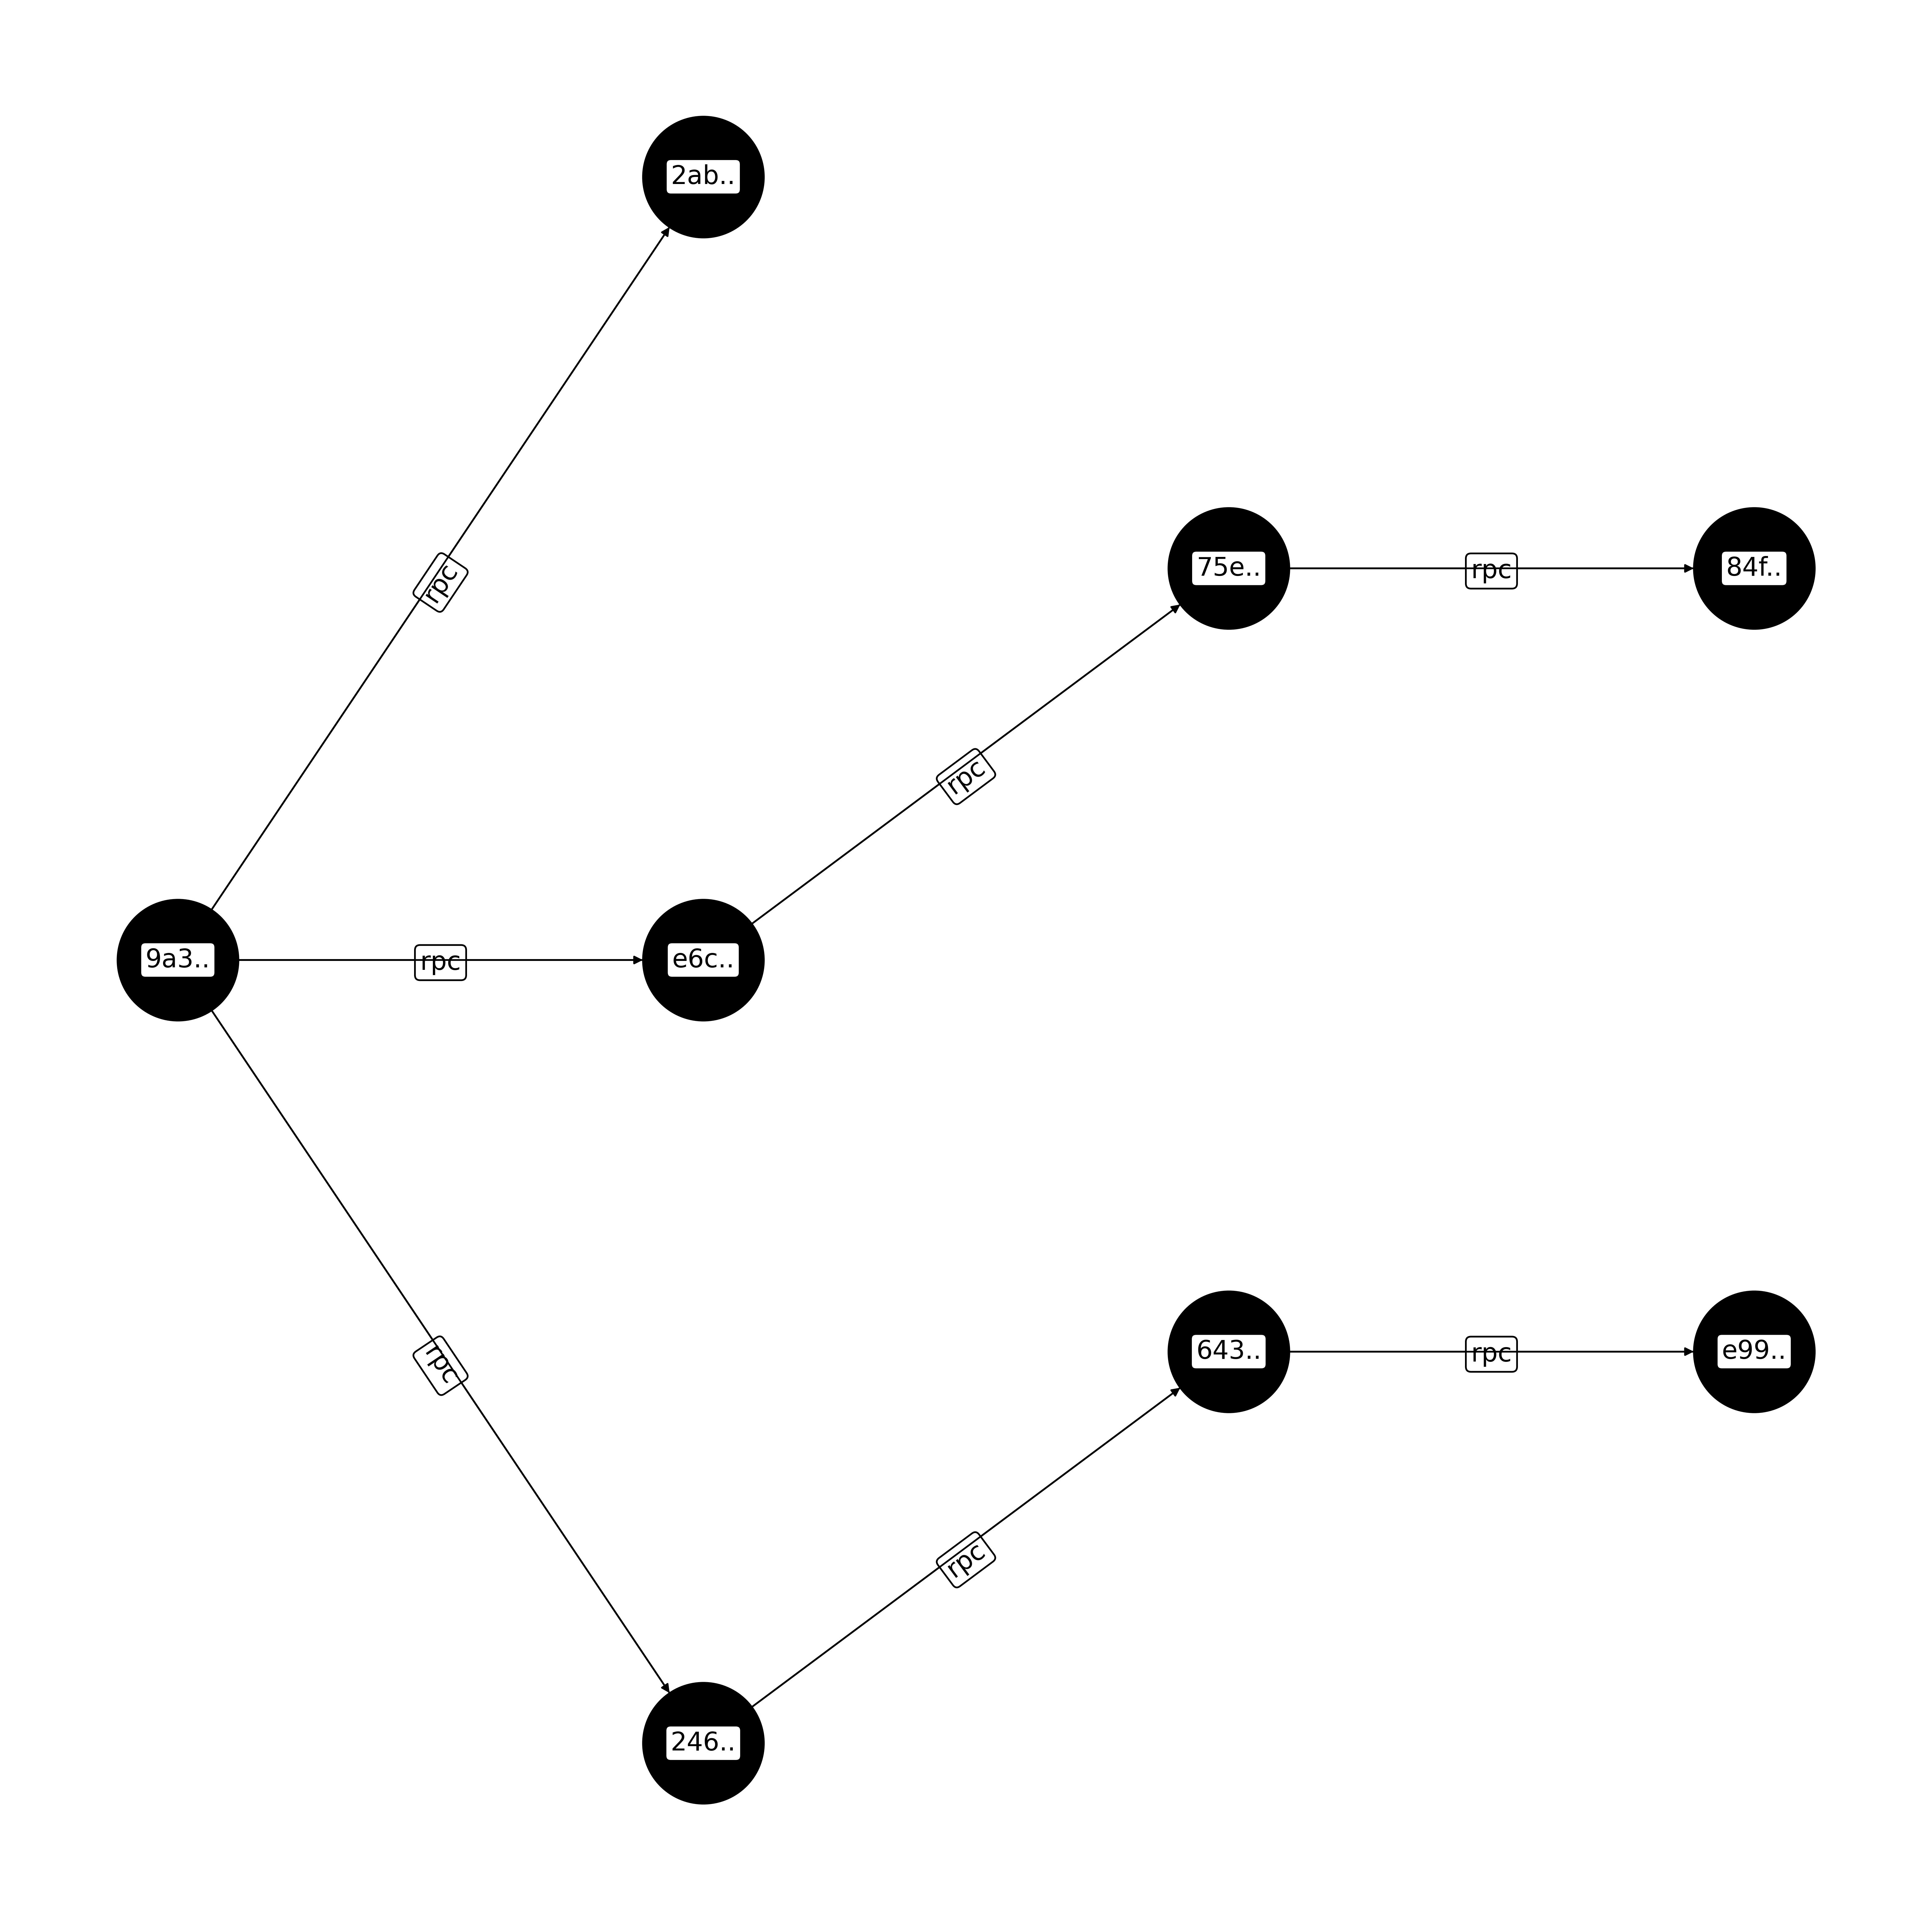

In [5]:
traces = list(set(df['traceid']))
for i in range(10):
    df2 = df[df['traceid'] == traces[i]]
    triplets = []
    entities = set()
    relations = set()
    for i in range(len(df2)):
        head = df2.iloc[i]['dm']
        tail = df2.iloc[i]['um']
        rel = df2.iloc[i]['rpctype']
        entities.add(head)
        entities.add(tail)
        relations.add(rel)
        triplets.append([head,rel,tail])
        
    # Create a graph object
    G = nx.Graph()

    
    
        
    
#     labelsDict = {}
    for entity in entities:
        G.add_node(entity)
#         labelsDict[entity] = entity
    for triplet in triplets:
        G.add_edge(triplet[0], triplet[2], label=triplet[1])


    T = nx.maximum_spanning_tree(G)

    # Determine the root node
    root = max(T.nodes(), key=lambda n: T.degree(n))
    draw_tree_graph_hierarchical(triplets,root)
    

In [6]:
import os
os.remove(f'MSCallGraph_0.csv')
